In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split 
pd.set_option('display.max_rows', 8000)
pd.set_option('display.max_columns', 60)
import random
random.seed(888)
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

!pip install dfply
from dfply import *
!pip install catboost

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN,SMOTETomek,SMOTEENN
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier

#Praproses

##evaluasi data

In [ ]:
#ibobTrain = pd.read_csv('https://raw.githubusercontent.com/dmonster304/joints-2020/master/train_data.csv')
ibobTrain = pd.read_csv('train.csv')
ibobTest = pd.read_csv('https://raw.githubusercontent.com/dmonster304/joints-2020/master/test_data.csv')
ibobTrain
ibobTest['Result'] = 0

In [ ]:
ibobTrain.select_dtypes(include=['object', 'category']).columns

Index([], dtype='object')

In [ ]:
obj = ibobTrain.columns[ibobTrain.dtypes.eq('object')]
for i in obj:
  ibobTrain[i] = ibobTrain[i].str.extract('(\d+)', expand=False)

In [ ]:
ibobTrain.shape

(3618, 42)

In [ ]:
#ibobTrain = ibobTrain.drop(['id'], axis=1)

##Cek missing value

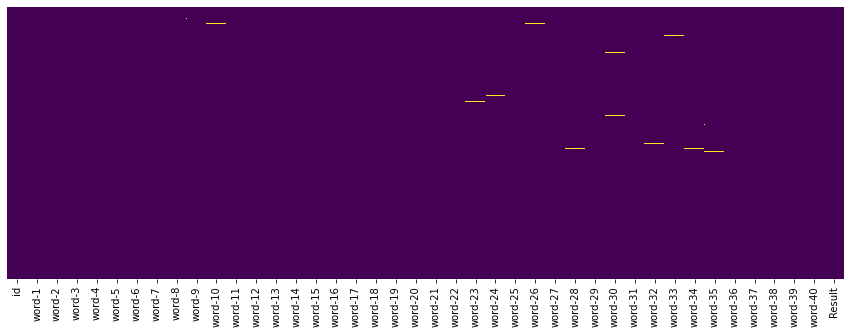

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(15,5))
sns.heatmap(ibobTrain.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
ibobTrain.isna().sum()

id          0
word-1      0
word-2      0
word-3      0
word-4      0
word-5      0
word-6      0
word-7      0
word-8      0
word-9     29
word-10    15
word-11     0
word-12     0
word-13     0
word-14     0
word-15     0
word-16     0
word-17     0
word-18     0
word-19     0
word-20     0
word-21     0
word-22     0
word-23    10
word-24     4
word-25     8
word-26     8
word-27     7
word-28     8
word-29    10
word-30    10
word-31     4
word-32     4
word-33    10
word-34     8
word-35    14
word-36     7
word-37     6
word-38     6
word-39     0
word-40     0
Result      0
dtype: int64

##Convert data ke float

In [ ]:
for i in ibobTrain.columns:
  ibobTrain[i] = pd.to_numeric(ibobTrain[i], errors='coerce').astype('float64')

##Data Anomali

In [ ]:
ibobTrain["word-4"][ibobTrain["word-4"]<0] = 1
ibobTrain["word-25"][ibobTrain["word-25"]<0] = 9

In [ ]:
ibobTrain.describe()

id       word-1       word-2       word-3       word-4  \
count  3618.000000  3618.000000  3618.000000  3618.000000  3618.000000   
mean   1810.613875    55.446379     1.760088     1.302377     1.932836   
std    1045.416703    89.142733     3.775851     2.765321     4.126379   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     905.250000    12.000000     0.000000     0.000000     0.000000   
50%    1811.500000    28.000000     1.000000     0.000000     1.000000   
75%    2715.750000    62.000000     2.000000     1.750000     2.000000   
max    3620.000000  1898.000000    81.000000    66.000000   117.000000   

            word-5       word-6       word-7       word-8       word-9  \
count  3618.000000  3618.000000  3618.000000  3618.000000  3589.000000   
mean      9.658928     3.048093     1.406855     4.785517     6.879354   
std      16.561053     6.065845     2.585294     7.480203    13.121663   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     1.000000     1.000000   
50%       5.000000     1.000000     0.000000     3.000000     3.000000   
75%      11.000000     3.000000     2.000000     6.000000     7.000000   
max     305.000000    89.000000    31.000000   135.000000   267.000000   

           word-10      word-11      word-12      word-13      word-14  \
count  3603.000000  3618.000000  3618.000000  3618.000000  3618.000000   
mean      3.250902     2.199558     1.291321     1.365948     3.087065   
std       5.085695     3.772048     2.738686     2.919787     4.570632   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       1.000000     1.000000     0.000000     0.000000     2.000000   
75%       4.000000     3.000000     1.000000     2.000000     4.000000   
max      67.000000    66.000000    56.000000    47.000000    45.000000   

           word-15      word-16      word-17      word-18      word-19  \
count  3618.000000  3618.000000  3618.000000  3618.000000  3618.000000   
mean      9.135158     1.438640     2.993367     1.485904    46.389442   
std      14.787509     2.672052     5.480451     3.017587    79.813198   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     9.000000   
50%       4.000000     0.000000     1.000000     0.000000    22.000000   
75%      10.750000     2.000000     3.000000     2.000000    50.000000   
max     275.000000    39.000000    83.000000    43.000000   972.000000   

           word-20      word-21      word-22      word-23      word-24  \
count  3618.000000  3618.000000  3618.000000  3608.000000  3614.000000   
mean      1.509950     1.260088    10.673577     5.351996     4.542335   
std       4.357603     2.491138    19.642333     9.094351     8.611410   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     1.000000     0.000000     0.000000   
50%       0.000000     0.000000     5.000000     2.000000     2.000000   
75%       2.000000     2.000000    12.000000     6.000000     5.000000   
max     123.000000    43.000000   223.000000   111.000000   131.000000   

           word-25      word-26      word-27      word-28      word-29  \
count  3610.000000  3610.000000  3611.000000  3610.000000  3608.000000   
mean      5.305540     1.073961     2.970645     2.642382    10.994180   
std       8.145395     3.086598     4.206936     6.340817    18.314558   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     1.000000     0.000000     2.000000   
50%       3.000000     0.000000     2.000000     1.000000     5.000000   
75%       6.000000     1.000000     4.000000     2.000000    12.000000   
max     108.000000    39.000000    62.000000    77.000000   302.000000   

           wor

##Drop Nan > 5

In [ ]:
dropna = ibobTrain.loc[ibobTrain.isnull().sum(1)>5].index
ibobTrain = ibobTrain.drop([1791,1799,2813])

In [ ]:
ibobTrain.shape

(3615, 42)

berkurang 3 biji baris

##Outlier

In [ ]:
ibobTrain["word-1"][ibobTrain["word-1"]>10000] =np.nan

In [ ]:
ibobTrain["word-19"][ibobTrain["word-19"]>1000] =np.nan

In [ ]:
ibobTrain["word-22"][ibobTrain["word-22"]>1000] =np.nan

In [ ]:
ibobTrain["word-36"][ibobTrain["word-36"]>1000] =np.nan

In [ ]:
ibobTrain["word-38"][ibobTrain["word-38"]>1000] =np.nan

In [ ]:
outlier = list(ibobTrain.loc[ibobTrain["word-1"]
                   + ibobTrain["word-19"]
                   + ibobTrain["word-22"]
                   + ibobTrain["word-36"]
                   + ibobTrain["word-38"]
                   >10000].index)
#ibobTrain.drop(ibobTrain.index[outlier], inplace=True)

##Cek Duplikat

In [ ]:
col = ['word-1', 'word-2', 'word-3', 'word-4', 'word-5', 'word-6',
       'word-7', 'word-8', 'word-9', 'word-10', 'word-11', 'word-12',
       'word-13', 'word-14', 'word-15', 'word-16', 'word-17', 'word-18',
       'word-19', 'word-20', 'word-21', 'word-22', 'word-23', 'word-24',
       'word-25', 'word-26', 'word-27', 'word-28', 'word-29', 'word-30',
       'word-31', 'word-32', 'word-33', 'word-34', 'word-35', 'word-36',
       'word-37', 'word-38', 'word-39', 'word-40']

In [ ]:
train_unique = ibobTrain.drop_duplicates(col)
train_unique.shape

(3280, 42)

In [ ]:
test_unique = ibobTest.drop_duplicates(col)
test_unique.shape

(1499, 42)

#Merge Train Test

##ganti

In [ ]:
all_unique = ibobTrain.append(ibobTest)
all_unique.shape

(5167, 42)

Text(0.5, 1.0, 'Plot Train Unique')

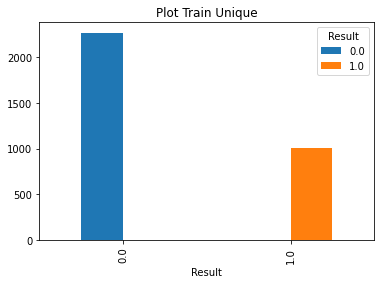

In [ ]:
pd.crosstab(train_unique.Result, train_unique.Result).plot(kind='bar', stacked = False)
plt.title('Plot Train Unique')

Berapa banyak baris unique yang ada di train dan test:

In [ ]:
test_unique.merge(train_unique,how='inner',on=col).shape

(102, 44)

Berapa banyak data test yang sudah diketahui

In [ ]:
ibobTest.merge(train_unique,how='inner',on=col).shape

(147, 44)

##data test yang sudah diketahui hasilnya

In [ ]:
ibobTest.merge(train_unique,how='inner',on=col)

id_x  word-1  word-2  word-3  word-4  word-5  word-6  word-7  word-8  \
0    3643     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1    3788     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2    4075     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    4804     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    4933     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5    3647     1.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
6    3694     4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7    3720     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8    4670     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9    3724     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
10   3756     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
11   4018     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12   4165     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
13   4301     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
14   4330     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
15   4339     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
16   4351     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
17   4384     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
18   4987     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
19   3736     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20   3824     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
21   3936     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
22   4308     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
23   4611     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
24   3741     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25   3856     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
26   3883     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
27   4056     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
28   4160     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29   4213     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
30   4256     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
31   5158     2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
32   3743    11.0     0.0     0.0     1.0     1.0     0.0     0.0     1.0   
33   3764    18.0     1.0     0.0     1.0     5.0     3.0     1.0     1.0   
34   3769     4.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
35   3818     4.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
36   3947     4.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
37   4208     4.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
38   4520     4.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
39   4815     4.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
40   3805    10.0     0.0     0.0     0.0     1.0     0.0     1.0     3.0   
41   3827    39.0     1.0     0.0     2.0    12.0     4.0     2.0     1.0   
42   3831    21.0     0.0     0.0     2.0     3.0     2.0     0.0     0.0   
43   3835    21.0     0.0     0.0     1.0     4.0     2.0     0.0     0.0   
44   3851     7.0     0.0     0.0     0.0     2.0     1.0     0.0     0.0   
45   3871    46.0     1.0     0.0     2.0     4.0     2.0     2.0     2.0   
46   3880    61.0     4.0     1.0     1.0     7.0     0.0     3.0     5.0   
47   3885    23.0     0.0     0.0     0.0     4.0     0.0     0.0     2.0   
48   3888    31.0     0.0     1.0     1.0     6.0     1.0     0.0     1.0   
49   3895    60.0     1.0     1.0     7.0    10.0     6.0     2.0     5.0   
50   3915    14.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5

##Isi Missing Value

In [ ]:
all_unique.fillna(all_unique.median(),inplace=True)

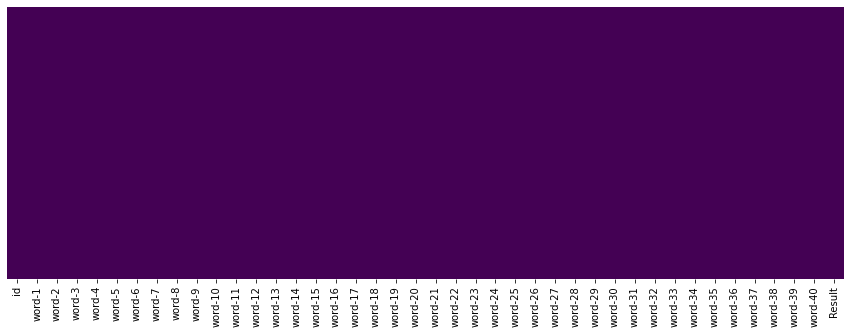

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(15,5))
sns.heatmap(all_unique.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
dup = all_unique[all_unique.iloc[:,1:41].duplicated(col,keep=False)]

In [ ]:
testpred = dup.iloc[567:,:]

In [ ]:
all_unique.shape

(5167, 42)

In [ ]:
all_unique.describe()

id       word-1       word-2       word-3       word-4  \
count  5167.000000  5167.000000  5167.000000  5167.000000  5167.000000   
mean   2587.391136    54.863364     1.790401     1.301722     1.901490   
std    1493.436708    86.234671     3.839048     2.665818     3.943878   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%    1293.500000    12.000000     0.000000     0.000000     0.000000   
50%    2589.000000    28.000000     1.000000     0.000000     1.000000   
75%    3880.500000    62.000000     2.000000     2.000000     2.000000   
max    5172.000000  1898.000000    81.000000    66.000000   117.000000   

            word-5       word-6       word-7       word-8       word-9  \
count  5167.000000  5167.000000  5167.000000  5167.000000  5167.000000   
mean      9.578285     3.068512     1.399265     4.766789     6.813431   
std      16.149791     6.043553     2.575508     7.505656    12.736574   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     1.000000     1.000000   
50%       5.000000     1.000000     0.000000     2.000000     3.000000   
75%      11.000000     3.000000     2.000000     6.000000     7.000000   
max     305.000000    89.000000    31.000000   135.000000   267.000000   

           word-10      word-11      word-12      word-13      word-14  \
count  5167.000000  5167.000000  5167.000000  5167.000000  5167.000000   
mean      3.210954     2.169537     1.268241     1.327076     3.122315   
std       5.028684     3.741437     2.650876     2.801721     4.666142   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       1.000000     1.000000     0.000000     0.000000     2.000000   
75%       4.000000     3.000000     1.000000     2.000000     4.000000   
max      67.000000    71.000000    56.000000    47.000000    47.000000   

           word-15      word-16      word-17      word-18      word-19  \
count  5167.000000  5167.000000  5167.000000  5167.000000  5167.000000   
mean      9.051674     1.428876     2.961293     1.486162    45.509967   
std      14.510127     2.631505     5.391097     3.036325    77.200413   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     8.000000   
50%       4.000000     0.000000     1.000000     0.000000    22.000000   
75%      10.000000     2.000000     3.000000     2.000000    49.000000   
max     275.000000    39.000000    83.000000    43.000000   972.000000   

           word-20      word-21      word-22      word-23      word-24  \
count  5167.000000  5167.000000  5167.000000  5167.000000  5167.000000   
mean      1.451326     1.222953    10.562996     5.353590     4.490807   
std       3.945219     2.375069    19.144515     9.068511     8.373600   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     1.000000     0.000000     0.000000   
50%       0.000000     0.000000     5.000000     2.000000     2.000000   
75%       2.000000     2.000000    12.000000     6.000000     5.000000   
max     123.000000    43.000000   223.000000   111.000000   131.000000   

           word-25      word-26      word-27      word-28      word-29  \
count  5167.000000  5167.000000  5167.000000  5167.000000  5167.000000   
mean      5.330946     1.061544     2.972131     2.618928    10.881362   
std       8.253533     3.012634     4.119912     6.228155    17.942418   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     1.000000     0.000000     2.000000   
50%       3.000000     0.000000     2.000000     1.000000     5.000000   
75%       6.000000     1.000000     4.000000     2.000000    12.000000   
max     108.000000    39.000000    62.000000    77.000000   302.000000   

           wor

In [ ]:
#zero = (ibobTrain == 0).astype(int).sum(axis=1).sort_values()
#zero

#FE

In [ ]:
all_unique.iloc[:,1:41].duplicated().sum()

519

In [ ]:
all_unique["no_missing"] = (all_unique.iloc[:,1:35].astype(bool).sum(axis=1))
all_unique['no_missing_discrete'] = pd.qcut(all_unique['no_missing'], q=3,labels=False)
#all_unique = all_unique.drop(['no_missing'],axis=1)

In [ ]:
all_unique["sum"] = all_unique.iloc[:,1:35].sum(axis=1)
all_unique['sum_discrete'] = pd.qcut(all_unique['sum'], q=4,labels=False)
#all_unique = all_unique.drop(['sum'],axis=1)

In [ ]:
all_unique["count_0"] = (all_unique.iloc[:,1:35] == 0).astype(int).sum(axis=1)
all_unique['sum_zero_discrete'] = pd.qcut(all_unique['count_0'], q=3,labels=False)

In [ ]:
#all_unique = all_unique.drop(['word-1','word-5','word-9','word-15','word-29','word-19'],axis=1)

In [ ]:
all_unique = all_unique[['id',
 'word-1',
 'word-2',
 'word-3',
 'word-4',
 'word-5',
 'word-6',
 'word-7',
 'word-8',
 'word-9',
 'word-10',
 'word-11',
 'word-12',
 'word-13',
 'word-14',
 'word-15',
 'word-16',
 'word-17',
 'word-18',
 'word-19',
 'word-20',
 'word-21',
 'word-22',
 'word-23',
 'word-24',
 'word-25',
 'word-26',
 'word-27',
 'word-28',
 'word-29',
 'word-30',
 'word-31',
 'word-32',
 'word-33',
 'word-34',
 'word-35',
 'word-36',
 'word-37',
 'word-38',
 'word-39',
 'word-40',
 'no_missing_discrete',
 'sum_discrete',
 'sum_zero_discrete',
 'no_missing',
 'sum',
 'count_0',
 'Result']]

In [ ]:
all_unique.rename(columns={'word-1':'1',
                    'word-2':'2',
                    'word-3':'3',
                    'word-4':'4',
                    'word-5':'5',
                    'word-6':'6',
                    'word-7':'7',
                    'word-8':'8',
                    'word-9':'9',
                    'word-10':'10',
                    'word-11':'11',
                    'word-12':'12',
                    'word-13':'13',
                    'word-14':'14',
                    'word-15':'15',
                    'word-16':'16',
                    'word-17':'17',
                    'word-18':'18',
                    'word-19':'19',
                    'word-20':'20',
                    'word-21':'21',
                    'word-22':'22',
                    'word-23':'23',
                    'word-24':'24',
                    'word-25':'25',
                    'word-26':'26',
                    'word-27':'27',
                    'word-28':'28',
                    'word-29':'29',
                    'word-30':'30',
                    'word-31':'31',
                    'word-32':'32',
                    'word-33':'33',
                    'word-34':'34',
                    'word-35':'35',
                    'word-36':'36',
                    'word-37':'37',
                    'word-38':'38',
                    'word-39':'39',
                    'word-40':'40',
}, 
                 inplace=True)

In [ ]:
all_unique['word_max'] = all_unique.iloc[:,1:41].idxmax(axis=1)
all_unique['word_max'] = all_unique['word_max'].astype('float')

In [ ]:
all_unique["maxi"] = all_unique.iloc[:,1:41].max(axis=1)

In [ ]:
all_unique.word_max.describe()

count    5167.000000
mean        4.674860
std         7.332116
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        39.000000
Name: word_max, dtype: float64

In [ ]:
all_unique['word_min'] = all_unique.iloc[:,1:41].idxmin(axis=1)
all_unique['word_min'] = all_unique['word_min'].astype('float')

In [ ]:
all_unique['range'] = all_unique['word_max'] - all_unique['word_min']

In [ ]:
all_unique['abs_avg'] = (all_unique['word_max'] + all_unique['word_min']) / 2

In [ ]:
all_unique['word_q25'] = np.quantile(all_unique.iloc[:,1:41],0.25)

In [ ]:
all_unique['word_q75'] = np.quantile(all_unique.iloc[:,1:40],0.75)

In [ ]:
all_unique['word_q95'] = np.quantile(all_unique.iloc[:,1:40],0.95)

In [ ]:
all_unique = all_unique.astype('float')

In [ ]:
all_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5167 entries, 0 to 1551
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5167 non-null   float64
 1   1                    5167 non-null   float64
 2   2                    5167 non-null   float64
 3   3                    5167 non-null   float64
 4   4                    5167 non-null   float64
 5   5                    5167 non-null   float64
 6   6                    5167 non-null   float64
 7   7                    5167 non-null   float64
 8   8                    5167 non-null   float64
 9   9                    5167 non-null   float64
 10  10                   5167 non-null   float64
 11  11                   5167 non-null   float64
 12  12                   5167 non-null   float64
 13  13                   5167 non-null   float64
 14  14                   5167 non-null   float64
 15  15                   5167 non-null   f

##Normalisasi

In [ ]:
from sklearn import preprocessing
#all_unique.iloc[:,1:35]= preprocessing.normalize(all_unique.iloc[:,1:35])

##Pisahin test

In [ ]:
all_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5167 entries, 0 to 1551
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5167 non-null   float64
 1   1                    5167 non-null   float64
 2   2                    5167 non-null   float64
 3   3                    5167 non-null   float64
 4   4                    5167 non-null   float64
 5   5                    5167 non-null   float64
 6   6                    5167 non-null   float64
 7   7                    5167 non-null   float64
 8   8                    5167 non-null   float64
 9   9                    5167 non-null   float64
 10  10                   5167 non-null   float64
 11  11                   5167 non-null   float64
 12  12                   5167 non-null   float64
 13  13                   5167 non-null   float64
 14  14                   5167 non-null   float64
 15  15                   5167 non-null   f

In [ ]:
all_unique.iloc[3615:,:].head()

id     1    2    3    4     5    6    7     8    9   10   11   12   13  \
0  3621.0   8.0  0.0  0.0  0.0   1.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  1.0   
1  3622.0  42.0  0.0  1.0  1.0   5.0  3.0  3.0   6.0  6.0  3.0  3.0  1.0  3.0   
2  3623.0   5.0  0.0  0.0  0.0   1.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
3  3624.0  33.0  0.0  0.0  0.0   7.0  0.0  1.0   4.0  4.0  5.0  0.0  1.0  0.0   
4  3625.0  87.0  0.0  1.0  2.0  16.0  7.0  2.0  12.0  2.0  6.0  2.0  3.0  0.0   

     14   15   16   17   18    19   20   21    22   23   24   25   26   27  \
0   2.0  2.0  1.0  0.0  0.0   5.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  0.0   
1   1.0  7.0  0.0  3.0  3.0  31.0  1.0  0.0   4.0  5.0  7.0  4.0  0.0  1.0   
2   0.0  3.0  0.0  0.0  0.0   3.0  0.0  0.0   0.0  1.0  0.0  2.0  0.0  1.0   
3   5.0  6.0  0.0  0.0  0.0  17.0  4.0  0.0   2.0  0.0  0.0  3.0  2.0  1.0   
4  10.0  4.0  4.0  3.0  2.0  48.0  1.0  2.0  12.0  5.0  1.0  8.0  1.0  2.0   

    28    29   30   31   32   33   34    35   36   37   38   39   40  \
0  0.0   0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0  1.0  0.0  0.0   
1  4.0   6.0  1.0  0.0  2.0  5.0  3.0   6.0  0.0  1.0  0.0  1.0  4.0   
2  1.0   0.0  0.0  0.0  0.0  2.0  0.0   3.0  0.0  0.0  0.0  2.0  0.0   
3  0.0  15.0  2.0  5.0  1.0  4.0  0.0   5.0  2.0  3.0  3.0  3.0  5.0   
4  1.0   7.0  1.0  1.0  1.0  4.0  2.0  13.0  4.0  1.0  0.0  0.0  4.0   

   no_missing_discrete  sum_discrete  sum_zero_discrete  no_missing    sum  \
0                  0.0           0.0                2.0        10.0   23.0   
1                  2.0           2.0                0.0        29.0  165.0   
2                  0.0           0.0                2.0         9.0   19.0   
3                  1.0           2.0                1.0        20.0  122.0   
4                  2.0           3.0                0.0        32.0  260.0   

   count_0  Result  word_max  maxi  word_min  range  abs_avg  word_q25  \
0     24.0     0.0       1.0   8.0       2.0   -1.0      1.5       0.0   
1      5.0     0.0       1.0  42.0       2.0   -1.0      1.5       0.0   
2     25.0     0.0       1.0   5.0       2.0   -1.0      1.5       0.0   
3     14.0     0.0       1.0  33.0       2.0   -1.0      1.5       0.0   
4      2.0     0.0       1.0  87.0       2.0   -1.0      1.5       0.0   

   word_q75  word_q95  
0       4.0      23.0  
1       4.0      23.0  
2       4.0      23.0  
3       4.0      23.0  
4       4.0      23.0

In [ ]:
test_cln = pd.concat([ibobTest["id"], all_unique.iloc[3615:,1:56]], axis=1)
test_cln = test_cln.drop(['Result'],axis=1)
train_cln = all_unique.iloc[:3615,1:56]

([<matplotlib.axis.XTick at 0x7f628a147c18>,
 [Text(0, 0, 'rendah'),
  Text(0, 0, 'sedang'),
  Text(0, 0, 'tinggi'),
  Text(0, 0, 'sangat tinggi')])

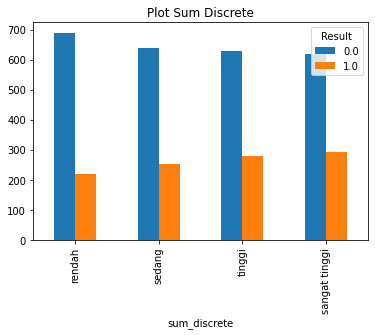

In [ ]:
pd.crosstab(train_cln['sum_discrete'], train_cln.Result).plot(kind='bar', stacked = False)
plt.title('Plot Sum Discrete')
plt.xticks([0, 1, 2, 3], ['rendah', 'sedang','tinggi', 'sangat tinggi'])

([<matplotlib.axis.XTick at 0x7f628968a550>,
 [Text(0, 0, 'rendah'), Text(0, 0, 'sedang'), Text(0, 0, 'tinggi')])

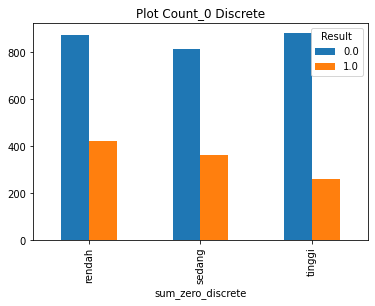

In [ ]:
pd.crosstab(train_cln['sum_zero_discrete'], train_cln.Result).plot(kind='bar', stacked = False)
plt.title('Plot Count_0 Discrete')
plt.xticks([0, 1, 2], ['rendah', 'sedang','tinggi'])

([<matplotlib.axis.XTick at 0x7f628c229400>,
 [Text(0, 0, 'rendah'), Text(0, 0, 'sedang'), Text(0, 0, 'tinggi')])

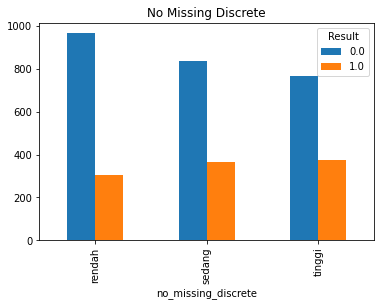

In [ ]:
pd.crosstab(train_cln['no_missing_discrete'], train_cln.Result).plot(kind='bar', stacked = False)
plt.title('No Missing Discrete')
plt.xticks([0, 1, 2], ['rendah', 'sedang','tinggi'])

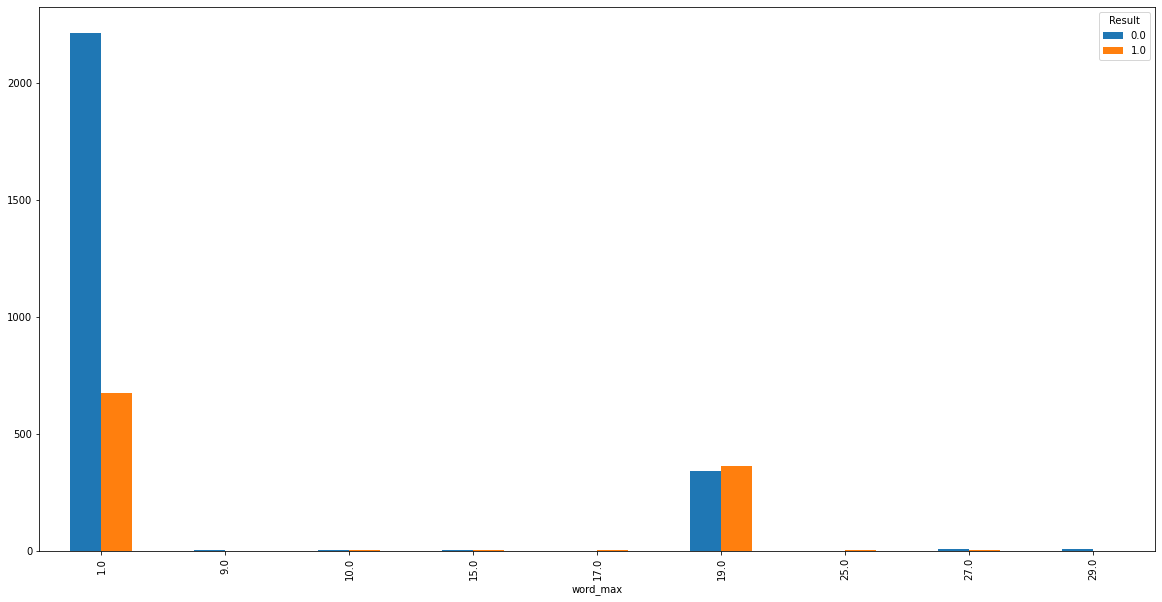

In [ ]:
pd.crosstab(train_cln.word_max, train_cln.Result).plot(figsize=(20,10),kind='bar', stacked = False)
plt.show()

In [ ]:
train_cln.tail()

1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
3613  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3614  0.0  1.0  0.0  0.0  4.0  3.0  2.0  5.0  4.0  0.0  1.0  1.0  1.0  1.0   
3615  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3616  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
3617  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       15   16   17   18    19   20   21   22   23   24   25   26   27   28  \
3613  0.0  0.0  0.0  0.0   2.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3614  5.0  2.0  4.0  3.0  17.0  0.0  0.0  4.0  6.0  2.0  4.0  0.0  2.0  1.0   
3615  1.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3616  0.0  0.0  0.0  0.0   1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3617  0.0  0.0  0.0  0.0   1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       29   30   31   32   33   34   35   36   37   38   39   40  \
3613  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
3614  1.0  0.0  1.0  1.0  4.0  3.0  1.0  2.0  0.0  0.0  0.0  0.0   
3615  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3616  3.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3617  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      no_missing_discrete  sum_discrete  sum_zero_discrete  no_missing   sum  \
3613                  0.0           0.0                2.0         4.0   7.0   
3614                  1.0           1.0                1.0        26.0  83.0   
3615                  0.0           0.0                2.0         3.0   3.0   
3616                  0.0           0.0                2.0         5.0   7.0   
3617                  0.0           0.0                2.0         2.0   2.0   

      count_0  Result  word_max  maxi  word_min  range  abs_avg  word_q25  \
3613     30.0     0.0      29.0   3.0       1.0   28.0     15.0       0.0   
3614      8.0     0.0      19.0  17.0       1.0   18.0     10.0       0.0   
3615     31.0     0.0      10.0   1.0       1.0    9.0      5.5       0.0   
3616     29.0     0.0      29.0   3.0       1.0   28.0     15.0       0.0   
3617     32.0     0.0      19.0   1.0       1.0   18.0     10.0       0.0   

      word_q75  word_q95  
3613       4.0      23.0  
3614       4.0      23.0  
3615       4.0      23.0  
3616       4.0      23.0  
3617       4.0      23.0

In [ ]:
test_cln.head()

id     1    2    3    4     5    6    7     8    9   10   11   12   13  \
0  3621   8.0  0.0  0.0  0.0   1.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  1.0   
1  3622  42.0  0.0  1.0  1.0   5.0  3.0  3.0   6.0  6.0  3.0  3.0  1.0  3.0   
2  3623   5.0  0.0  0.0  0.0   1.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
3  3624  33.0  0.0  0.0  0.0   7.0  0.0  1.0   4.0  4.0  5.0  0.0  1.0  0.0   
4  3625  87.0  0.0  1.0  2.0  16.0  7.0  2.0  12.0  2.0  6.0  2.0  3.0  0.0   

     14   15   16   17   18    19   20   21    22   23   24   25   26   27  \
0   2.0  2.0  1.0  0.0  0.0   5.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  0.0   
1   1.0  7.0  0.0  3.0  3.0  31.0  1.0  0.0   4.0  5.0  7.0  4.0  0.0  1.0   
2   0.0  3.0  0.0  0.0  0.0   3.0  0.0  0.0   0.0  1.0  0.0  2.0  0.0  1.0   
3   5.0  6.0  0.0  0.0  0.0  17.0  4.0  0.0   2.0  0.0  0.0  3.0  2.0  1.0   
4  10.0  4.0  4.0  3.0  2.0  48.0  1.0  2.0  12.0  5.0  1.0  8.0  1.0  2.0   

    28    29   30   31   32   33   34    35   36   37   38   39   40  \
0  0.0   0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0  1.0  0.0  0.0   
1  4.0   6.0  1.0  0.0  2.0  5.0  3.0   6.0  0.0  1.0  0.0  1.0  4.0   
2  1.0   0.0  0.0  0.0  0.0  2.0  0.0   3.0  0.0  0.0  0.0  2.0  0.0   
3  0.0  15.0  2.0  5.0  1.0  4.0  0.0   5.0  2.0  3.0  3.0  3.0  5.0   
4  1.0   7.0  1.0  1.0  1.0  4.0  2.0  13.0  4.0  1.0  0.0  0.0  4.0   

   no_missing_discrete  sum_discrete  sum_zero_discrete  no_missing    sum  \
0                  0.0           0.0                2.0        10.0   23.0   
1                  2.0           2.0                0.0        29.0  165.0   
2                  0.0           0.0                2.0         9.0   19.0   
3                  1.0           2.0                1.0        20.0  122.0   
4                  2.0           3.0                0.0        32.0  260.0   

   count_0  word_max  maxi  word_min  range  abs_avg  word_q25  word_q75  \
0     24.0       1.0   8.0       2.0   -1.0      1.5       0.0       4.0   
1      5.0       1.0  42.0       2.0   -1.0      1.5       0.0       4.0   
2     25.0       1.0   5.0       2.0   -1.0      1.5       0.0       4.0   
3     14.0       1.0  33.0       2.0   -1.0      1.5       0.0       4.0   
4      2.0       1.0  87.0       2.0   -1.0      1.5       0.0       4.0   

   word_q95  
0      23.0  
1      23.0  
2      23.0  
3      23.0  
4      23.0

#Modeling

In [ ]:
train_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3615 entries, 0 to 3617
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   1                    3615 non-null   float64
 1   2                    3615 non-null   float64
 2   3                    3615 non-null   float64
 3   4                    3615 non-null   float64
 4   5                    3615 non-null   float64
 5   6                    3615 non-null   float64
 6   7                    3615 non-null   float64
 7   8                    3615 non-null   float64
 8   9                    3615 non-null   float64
 9   10                   3615 non-null   float64
 10  11                   3615 non-null   float64
 11  12                   3615 non-null   float64
 12  13                   3615 non-null   float64
 13  14                   3615 non-null   float64
 14  15                   3615 non-null   float64
 15  16                   3615 non-null   f

##SPLIT

In [ ]:
#X=ibobTrain.iloc[:,:40]
X=train_cln.iloc[:,:55]
X= X.drop(['Result'],axis=1)
#X=tf_idf
y=train_cln['Result']
y=y.astype('int')
X=X.astype('int')

[0.0269366  0.01579609 0.00820249 0.01042729 0.01712022 0.01284451
 0.01014782 0.0334016  0.02098876 0.01083364 0.03299541 0.02018481
 0.01145361 0.05169065 0.02632629 0.01051342 0.01275616 0.01013384
 0.03505413 0.01114877 0.00932406 0.02244206 0.01436324 0.02352998
 0.0196293  0.01073309 0.01494381 0.02404102 0.02913526 0.04949816
 0.01023216 0.01701135 0.05142184 0.01488645 0.02019515 0.01014002
 0.02874145 0.01860282 0.01432968 0.02514565 0.00277535 0.00261275
 0.00316431 0.02361699 0.03072322 0.02301772 0.01708997 0.02679278
 0.01019939 0.02401532 0.01868956 0.         0.         0.        ]


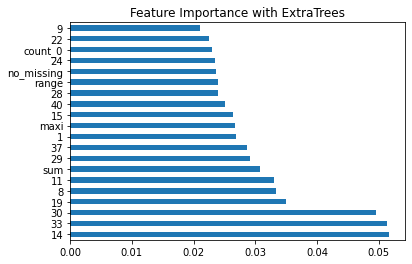

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance with ExtraTrees')
plt.show()

In [ ]:
train_cln.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', 'no_missing_discrete', 'sum_discrete',
       'sum_zero_discrete', 'no_missing', 'sum', 'count_0', 'Result',
       'word_max', 'maxi', 'word_min', 'range', 'abs_avg', 'word_q25',
       'word_q75', 'word_q95'],
      dtype='object')

In [ ]:
importance = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', 'no_missing', 'sum', 'count_0','word_min','word_max', 'range', 'abs_avg', 'word_q25', 'word_q75',
       'word_q95'
       ]
X = X[importance]

In [ ]:
X.describe()

1            2            3            4            5  \
count  3615.000000  3615.000000  3615.000000  3615.000000  3615.000000   
mean     55.474136     1.760443     1.303181     1.933887     9.663900   
std      89.174179     3.777227     2.766294     4.127841    16.566669   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      12.000000     0.000000     0.000000     0.000000     1.000000   
50%      28.000000     1.000000     0.000000     1.000000     5.000000   
75%      62.000000     2.000000     2.000000     2.000000    11.000000   
max    1898.000000    81.000000    66.000000   117.000000   305.000000   

                 6            7            8            9           10  \
count  3615.000000  3615.000000  3615.000000  3615.000000  3615.000000   
mean      3.049239     1.407746     4.787828     6.853112     3.243154   
std       6.068034     2.586146     7.482839    13.077850     5.078936   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     1.000000     1.000000     0.000000   
50%       1.000000     0.000000     3.000000     3.000000     1.000000   
75%       3.000000     2.000000     6.000000     7.000000     4.000000   
max      89.000000    31.000000   135.000000   267.000000    67.000000   

               11           12           13           14           15  \
count  3615.00000  3615.000000  3615.000000  3615.000000  3615.000000   
mean      2.20083     1.291563     1.367082     3.089350     9.141632   
std       3.77333     2.739708     2.920733     4.571819    14.791930   
min       0.00000     0.000000     0.000000     0.000000     0.000000   
25%       0.00000     0.000000     0.000000     1.000000     1.000000   
50%       1.00000     0.000000     0.000000     2.000000     4.000000   
75%       3.00000     1.000000     2.000000     4.000000    11.000000   
max      66.00000    56.000000    47.000000    45.000000   275.000000   

                16           17           18           19           20  \
count  3615.000000  3615.000000  3615.000000  3615.000000  3615.000000   
mean      1.439834     2.995574     1.487137    46.418257     1.510650   
std       2.672839     5.482172     3.018535    79.839916     4.359259   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     9.000000     0.000000   
50%       0.000000     1.000000     0.000000    22.000000     0.000000   
75%       2.000000     3.000000     2.000000    50.000000     2.000000   
max      39.000000    83.000000    43.000000   972.000000   123.000000   

                21           22           23           24           25  \
count  3615.000000  3615.000000  3615.000000  3615.000000  3615.000000   
mean      1.260858    10.680221     5.347165     4.542185     5.303181   
std       2.491991    19.649040     9.085941     8.610127     8.139822   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     0.000000     1.000000   
50%       0.000000     5.000000     2.000000     2.000000     3.000000   
75%       2.000000    12.000000     6.000000     5.000000     6.000000   
max      43.000000   223.000000   111.000000   131.000000   108.000000   

                26           27           28           29           30  \
count  3615.000000  3615.000000  3615.000000  3615.000000  3615.000000   
mean      1.072476     2.970401     2.640111    10.983956     1.554910   
std       3.084720     4.204375     6.336723    18.298130     3.245057   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     2.000000     0.000000   
50%       0.000000     2.000000     1.000000     5.000000     0.000000   
75%       1.000000     4.000000     2.000000    12.000000     2.000000   
max      39.000000    62.000000    77.000000   302.000000    37.000000   

                31      

In [ ]:
'''import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler


# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()'''

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn import datasets\nfrom sklearn.decomposition import PCA\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\n\n\n# In general, it\'s a good idea to scale the data prior to PCA.\nscaler = StandardScaler()\nscaler.fit(X)\nX=scaler.transform(X)    \npca = PCA()\nx_new = pca.fit_transform(X)\n\ndef myplot(score,coeff,labels=None):\n    xs = score[:,0]\n    ys = score[:,1]\n    n = coeff.shape[0]\n    scalex = 1.0/(xs.max() - xs.min())\n    scaley = 1.0/(ys.max() - ys.min())\n    plt.scatter(xs * scalex,ys * scaley, c = y)\n    for i in range(n):\n        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = \'r\',alpha = 0.5)\n        if labels is None:\n            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = \'g\', ha = \'center\', va = \'center\')\n        else:\n            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = \'g\', ha = \'center\', va = \'center\')\n    p

##Split train test & SMOTE

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y) 
'''print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_sample(x_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))
#x_train = np.asmatrix(x_train)
#x_test = np.asmatrix(x_test)'''

'print("Before OverSampling, counts of label \'1\': {}".format(sum(y_train==1)))\nprint("Before OverSampling, counts of label \'0\': {} \n".format(sum(y_train==0)))\nsm = SMOTE(random_state=2)\nx_train, y_train = sm.fit_sample(x_train, y_train.ravel())\nprint(\'After OverSampling, the shape of train_X: {}\'.format(x_train.shape))\nprint(\'After OverSampling, the shape of train_y: {} \n\'.format(y_train.shape))\n\nprint("After OverSampling, counts of label \'1\': {}".format(sum(y_train==1)))\nprint("After OverSampling, counts of label \'0\': {}".format(sum(y_train==0)))\n#x_train = np.asmatrix(x_train)\n#x_test = np.asmatrix(x_test)'

In [ ]:
stack= pd.DataFrame(columns=['ExtraTrees', 'RandomForest', 'GB','LGBM'])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be |applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


##ExtraTrees Model

In [ ]:
extra_model = ExtraTreesClassifier()

In [ ]:
from sklearn.model_selection import StratifiedKFold, learning_curve
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = extra_model
print("CV ExtraTrees\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV ExtraTrees

Accuracy in CV - 1: 0.8793103448275862
Accuracy in CV - 2: 0.8758620689655172
Accuracy in CV - 3: 0.8754325259515571
Accuracy in CV - 4: 0.8858131487889274
Accuracy in CV - 5: 0.8512110726643599
Accuracy in CV - 6: 0.8546712802768166
Accuracy in CV - 7: 0.8581314878892734
Accuracy in CV - 8: 0.8858131487889274
Accuracy in CV - 9: 0.8581314878892734
Accuracy in CV - 10: 0.889273356401384

Mean: 0    0.871365
dtype: float64


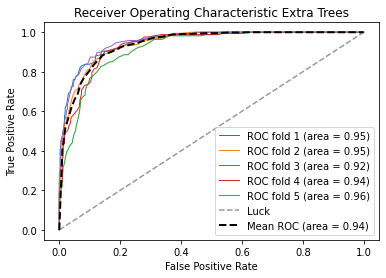

In [ ]:
# Run classifier with cross-validation and plot ROC curves

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = StratifiedKFold(n_splits=5, random_state=7)
classifier = extra_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Extra Trees')
plt.legend(loc="lower right")
plt.show()


ExtraTrees Result Before Tuning:
accuracy score: 0.8782849239280774
recall score: 0.6842105263157895
precision score: 0.8666666666666667
f1score: 0.8413081650570677
MAE: 0.12171507607192254
MSE: 0.12171507607192254
RMSE: 0.34887687809873924
Confusion matrix, without normalization
[[492  22]
 [ 66 143]]


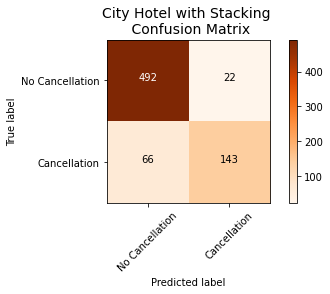

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
import sklearn.metrics as metrics
extra_model.fit(x_train,y_train)
y_pred = extra_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nExtraTrees Result Before Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="City Hotel with Stacking \n Confusion Matrix", cmap=plt.cm.Oranges)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = rf_model
print("CV Random Forest\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV Random Forest

Accuracy in CV - 1: 0.8827586206896552
Accuracy in CV - 2: 0.8931034482758621
Accuracy in CV - 3: 0.8719723183391004
Accuracy in CV - 4: 0.8788927335640139
Accuracy in CV - 5: 0.8581314878892734
Accuracy in CV - 6: 0.8512110726643599
Accuracy in CV - 7: 0.8546712802768166
Accuracy in CV - 8: 0.8858131487889274
Accuracy in CV - 9: 0.8719723183391004
Accuracy in CV - 10: 0.9134948096885813

Mean: 0    0.876202
dtype: float64


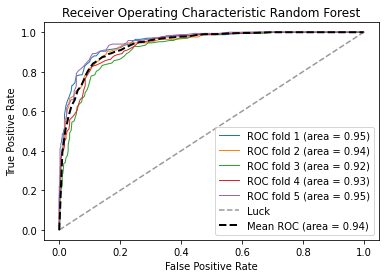

In [ ]:
# Tanpa cross_sell
# Run classifier with cross-validation and plot ROC curves

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = StratifiedKFold(n_splits=5, random_state=7)
classifier = rf_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Random Forest')
plt.legend(loc="lower right")
plt.show()


RandomForest Result Before Tuning:
accuracy score: 0.8865836791147994
recall score: 0.7129186602870813
precision score: 0.8713450292397661
f1score: 0.8536437246963562
MAE: 0.11341632088520055
MSE: 0.11341632088520055
RMSE: 0.33677339693806063
Confusion matrix, without normalization
[[492  22]
 [ 60 149]]


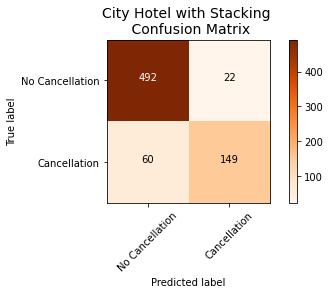

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
import sklearn.metrics as metrics
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nRandomForest Result Before Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="City Hotel with Stacking \n Confusion Matrix", cmap=plt.cm.Oranges)

##Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

In [ ]:
x_trainm = np.asmatrix(x_train)
x_testm = np.asmatrix(x_test)
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = gb_model
print("CV Random Forest\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV Random Forest

Accuracy in CV - 1: 0.8758620689655172
Accuracy in CV - 2: 0.8793103448275862
Accuracy in CV - 3: 0.8685121107266436
Accuracy in CV - 4: 0.8685121107266436
Accuracy in CV - 5: 0.8546712802768166
Accuracy in CV - 6: 0.8685121107266436
Accuracy in CV - 7: 0.8581314878892734
Accuracy in CV - 8: 0.8754325259515571
Accuracy in CV - 9: 0.8581314878892734
Accuracy in CV - 10: 0.8996539792387543

Mean: 0    0.870673
dtype: float64


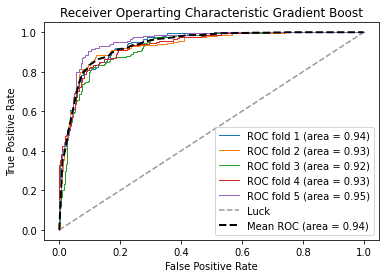

In [ ]:
# Tanpa cross_sell
# Run classifier with cross-validation and plot ROC curves

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = StratifiedKFold(n_splits=5, random_state=7)
classifier = gb_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operarting Characteristic Gradient Boost')
plt.legend(loc="lower right")
plt.show()


Gradient Boost Result Before Tuning:
accuracy score: 0.8713692946058091
recall score: 0.7033492822966507
precision score: 0.8258426966292135
f1score: 0.8359356127983837
MAE: 0.12863070539419086
MSE: 0.12863070539419086
RMSE: 0.35865123085553585
Confusion matrix, without normalization
[[483  31]
 [ 62 147]]


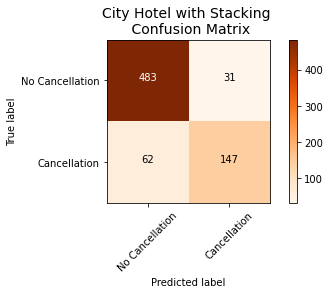

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
import sklearn.metrics as metrics
gb_model.fit(x_train,y_train)
y_pred = gb_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nGradient Boost Result Before Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="City Hotel with Stacking \n Confusion Matrix", cmap=plt.cm.Oranges)

##XGBoost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [ ]:
skf = StratifiedKFold(n_splits=10)
i = 0
score = []
model = xgb_model
print("CV Gradient Boost\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV Gradient Boost

Accuracy in CV - 1: 0.8551724137931035
Accuracy in CV - 2: 0.896551724137931
Accuracy in CV - 3: 0.889273356401384
Accuracy in CV - 4: 0.8615916955017301
Accuracy in CV - 5: 0.8788927335640139
Accuracy in CV - 6: 0.8512110726643599
Accuracy in CV - 7: 0.8788927335640139
Accuracy in CV - 8: 0.8685121107266436
Accuracy in CV - 9: 0.8823529411764706
Accuracy in CV - 10: 0.916955017301038

Mean: Series([], dtype: float64)


In [ ]:
# Tanpa cross_sell
# Run classifier with cross-validation and plot ROC curves

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = StratifiedKFold(n_splits=5, random_state=7)
classifier = xgb_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ValueError: ignored


XGB After Tuning:
accuracy score: 0.8755186721991701
recall score: 0.722488038277512
precision score: 0.825136612021858
f1score: 0.842509584478953
MAE: 0.12448132780082988
MSE: 0.12448132780082988
RMSE: 0.3528191148461629
Confusion matrix, without normalization
[[482  32]
 [ 58 151]]


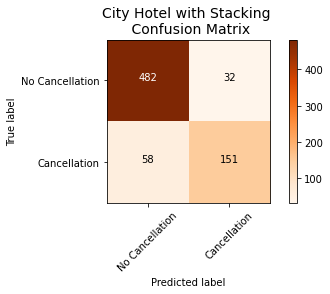

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
import sklearn.metrics as metrics
xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nXGB After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="City Hotel with Stacking \n Confusion Matrix", cmap=plt.cm.Oranges)

##LGBM

In [ ]:
lgbm_model = lgb.LGBMClassifier()

In [ ]:
skf = StratifiedKFold(n_splits=10)
i = 0
score = []
model = lgbm_model
print("CV LGBM\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV LGBM

Accuracy in CV - 1: 0.9137931034482759
Accuracy in CV - 2: 0.9172413793103448
Accuracy in CV - 3: 0.8858131487889274
Accuracy in CV - 4: 0.9100346020761245
Accuracy in CV - 5: 0.8615916955017301
Accuracy in CV - 6: 0.8858131487889274
Accuracy in CV - 7: 0.8546712802768166
Accuracy in CV - 8: 0.903114186851211
Accuracy in CV - 9: 0.8788927335640139
Accuracy in CV - 10: 0.9377162629757786

Mean: 0    0.894868
dtype: float64


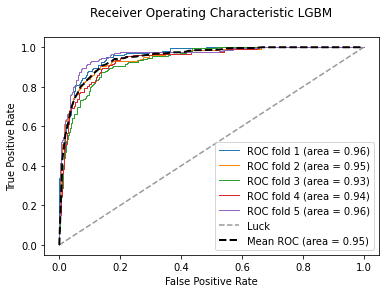

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5)
classifier = lgbm_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic LGBM\n')
plt.legend(loc="lower right")
plt.show()


LGBM Result Before Tuning:
accuracy score: 0.8921161825726142
recall score: 0.7703349282296651
precision score: 0.8429319371727748
f1score: 0.8652151051625239
MAE: 0.1078838174273859
MSE: 0.1078838174273859
RMSE: 0.32845672078279337
Confusion matrix, without normalization
[[484  30]
 [ 48 161]]


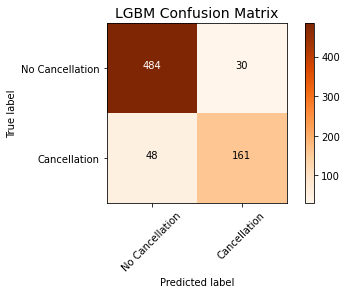

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
import sklearn.metrics as metrics
lgbm_model.fit(x_train,y_train)
y_pred = lgbm_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nLGBM Result Before Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="LGBM Confusion Matrix", cmap=plt.cm.Oranges)

##BBC

In [ ]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier()

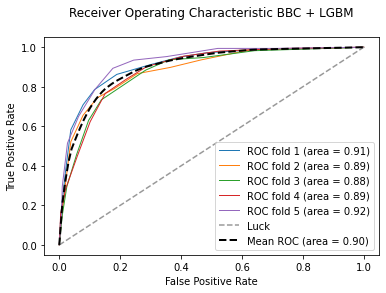

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5)
classifier = bbc
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic BBC + LGBM\n')
plt.legend(loc="lower right")
plt.show()

In [ ]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BalancedBaggingClassifier(lgb.LGBMClassifier(max_depth=-1, random_state=888, silent=False, metric='None', n_jobs=4, n_estimators=1000),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, scoring = 'accuracy')
clf.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecate

KeyboardInterrupt: ignored

In [ ]:
clf_best = clf.best_estimator_

# Best score
clf.best_score_

0.867223048926977

In [ ]:
clf_best

BalancedBaggingClassifier(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                        class_weight=None,
                                                        colsample_bytree=1.0,
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=5,
                                                        min_child_samples=20,
                                                        min_child_weight=0.001,
                                                        min_split_gain=0.0,
                                                        n_estimators=100,
                                                        n_jobs=-1,
                                                        num_leaves=31,
                                                        objective=None,
                          

In [ ]:
bbc = BalancedBaggingClassifier(base_estimator=lgb.LGBMClassifier(boosting_type='gbdt',
                                                        class_weight=None,
                                                        colsample_bytree=1.0,
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=5,
                                                        min_child_samples=20,
                                                        min_child_weight=0.001,
                                                        min_split_gain=0.0,
                                                        n_estimators=100,
                                                        n_jobs=-1,
                                                        num_leaves=31,
                                                        objective=None,
                                                        random_state=None,
                                                        reg_alpha=0.0,
                                                        reg_lambda=0.0,
                                                        silent=True,
                                                        subsample=1.0,
                                                        subsample_for_bin=200000,
                                                        subsample_freq=0),
                          bootstrap=True, bootstrap_features=False,
                          max_features=0.5, max_samples=0.5, n_estimators=100,
                          n_jobs=1, oob_score=False, random_state=None,
                          ratio=None, replacement=False,
                          sampling_strategy='auto', verbose=0,
                          warm_start=False)

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
skf = StratifiedKFold(n_splits=10)
i = 0
score = []
model = bbc
print("CV BBC\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV BBC

Accuracy in CV - 1: 0.8551724137931035
Accuracy in CV - 2: 0.8586206896551725
Accuracy in CV - 3: 0.8200692041522492
Accuracy in CV - 4: 0.8339100346020761
Accuracy in CV - 5: 0.8269896193771626
Accuracy in CV - 6: 0.8131487889273357
Accuracy in CV - 7: 0.8096885813148789
Accuracy in CV - 8: 0.8339100346020761
Accuracy in CV - 9: 0.8477508650519031
Accuracy in CV - 10: 0.8961937716262975

Mean: 0    0.839545
dtype: float64



LGBM Result Before Tuning:
accuracy score: 0.8741355463347165
recall score: 0.8807339449541285
precision score: 0.7470817120622568
f1score: 0.857351617973874
MAE: 0.12586445366528354
MSE: 0.12586445366528354
RMSE: 0.3547738063404393
Confusion matrix, without normalization
[[440  65]
 [ 26 192]]


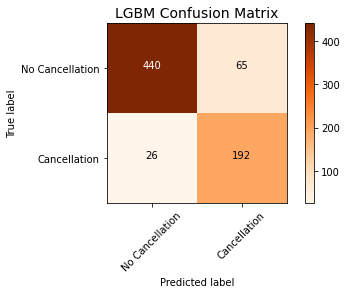

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
import sklearn.metrics as metrics
bbc.fit(x_train,y_train)
y_pred = bbc.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nLGBM Result Before Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="LGBM Confusion Matrix", cmap=plt.cm.Oranges)

##BRFC

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42)

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = eec
print("CV EEC\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV Balanced Random Forest

Accuracy in CV - 1: 0.8517241379310345
Accuracy in CV - 2: 0.8413793103448276
Accuracy in CV - 3: 0.8131487889273357
Accuracy in CV - 4: 0.8858131487889274
Accuracy in CV - 5: 0.8615916955017301
Accuracy in CV - 6: 0.8373702422145328
Accuracy in CV - 7: 0.8442906574394463
Accuracy in CV - 8: 0.8788927335640139
Accuracy in CV - 9: 0.8373702422145328
Accuracy in CV - 10: 0.8304498269896193

Mean: 0    0.848203
dtype: float64


#Tuning Parameter

In [ ]:
kfold = StratifiedKFold(n_splits=10)

In [ ]:
sns.set(style='white', context='notebook', palette='deep')
random_state = 7
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

KeyboardInterrupt: ignored

In [ ]:
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'criterion': ["gini","entropy"]
}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="f1_macro", n_jobs= 4, verbose = 1)

gsExtC.fit(x_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

In [ ]:
ExtC_best

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'criterion": ["gini","entropy"]
}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="f1_score", n_jobs= 4, verbose = 1)

gsRFC.fit(x_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

In [ ]:
RFC_best

In [ ]:
'''GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="f1_score", n_jobs= 4, verbose = 1)

gsGBC.fit(x_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_'''

In [ ]:
GBC_best

In [ ]:
lgbm = lgb.LGBMClassifier()
lgbm_param_grid = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }


gslgbm = GridSearchCV(lgbm,param_grid = lgbm_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gslgbm.fit(x_train,y_train)

lgbm_best = gslgbm.best_estimator_

# Best score
gslgbm.best_score_

Fitting 10 folds for each of 3456 candidates, totalling 34560 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   35.6s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed:  9.3min
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 10.6min
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed: 12.4mi

0.8544546484584652

In [ ]:
lgbm_best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.64,
               importance_type='split', learning_rate=0.01, max_bin=510,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=24, n_jobs=-1, num_leaves=16,
               objective='binary', random_state=500, reg_alpha=1, reg_lambda=1,
               silent=True, subsample=0.7, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
lgbm_best = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=False, metric='None', n_jobs=4, n_estimators=1000)
lgbm_best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='None', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=4, num_leaves=31,
               objective=None, random_state=314, reg_alpha=0.0, reg_lambda=0.0,
               silent=False, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
xgb = xgb.XGBClassifier()
xgb_param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

gsxgb = GridSearchCV(xgb,param_grid = xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsxgb.fit(x_train,y_train)

xgb_best = gsxgb.best_estimator_

# Best score
gsxgb.best_score_

AttributeError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

y_true, y_pred = y_test , clf.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

KeyboardInterrupt: ignored

#MODELING WITH TUNING

##ExtraTrees Tuning

In [ ]:
extra_model = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
                   learning_rate=0.2, n_estimators=2, random_state=7)



In [ ]:
from sklearn.model_selection import StratifiedKFold, learning_curve
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = extra_model
print("CV ADA+RF\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV ADA+RF

Accuracy in CV - 1: 0.8793103448275862
Accuracy in CV - 2: 0.8827586206896552
Accuracy in CV - 3: 0.8546712802768166
Accuracy in CV - 4: 0.8996539792387543
Accuracy in CV - 5: 0.8858131487889274
Accuracy in CV - 6: 0.8719723183391004
Accuracy in CV - 7: 0.903114186851211
Accuracy in CV - 8: 0.889273356401384
Accuracy in CV - 9: 0.8719723183391004
Accuracy in CV - 10: 0.8650519031141869

Mean: 0    0.880359
dtype: float64


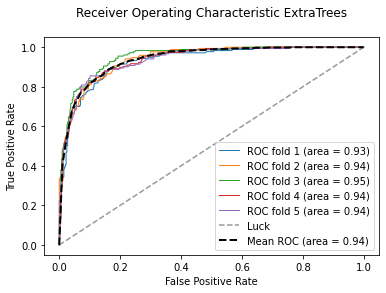

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5, random_state=7)
classifier = extra_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ExtraTrees\n')
plt.legend(loc="lower right")
plt.show()


ExtraTrees Result After Tuning:
accuracy score: 0.8796680497925311
recall score: 0.7033492822966507
precision score: 0.8546511627906976
f1score: 0.8449817012310081
MAE: 0.12033195020746888
MSE: 0.12033195020746888
RMSE: 0.3468889594776243
Confusion matrix, without normalization
[[489  25]
 [ 62 147]]


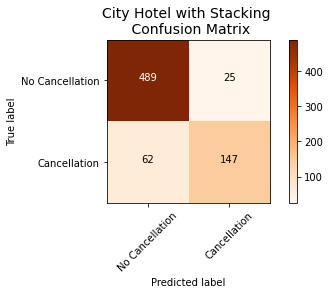

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
import sklearn.metrics as metrics
extra_model.fit(x_train,y_train)
y_pred = extra_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nExtraTrees Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="City Hotel with Stacking \n Confusion Matrix", cmap=plt.cm.Oranges)

##RF Tuning

In [ ]:
rf_model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = rf_model
print("CV Random Forest\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV Random Forest

Accuracy in CV - 1: 0.9
Accuracy in CV - 2: 0.8931034482758621
Accuracy in CV - 3: 0.8788927335640139
Accuracy in CV - 4: 0.8788927335640139
Accuracy in CV - 5: 0.8512110726643599
Accuracy in CV - 6: 0.8719723183391004
Accuracy in CV - 7: 0.8512110726643599
Accuracy in CV - 8: 0.8961937716262975
Accuracy in CV - 9: 0.8650519031141869
Accuracy in CV - 10: 0.9134948096885813

Mean: 0    0.880002
dtype: float64


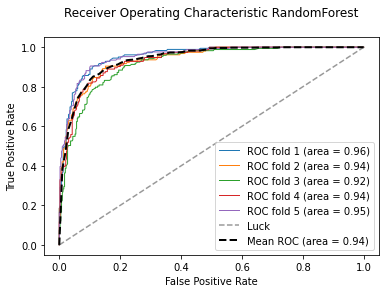

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5, random_state=7)
classifier = rf_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic RandomForest\n')
plt.legend(loc="lower right")
plt.show()


RandomForest Result After Tuning:
accuracy score: 0.8907330567081605
recall score: 0.7416267942583732
precision score: 0.8611111111111112
f1score: 0.8610876686941993
MAE: 0.10926694329183956
MSE: 0.10926694329183956
RMSE: 0.3305555071267752
Confusion matrix, without normalization
[[489  25]
 [ 54 155]]


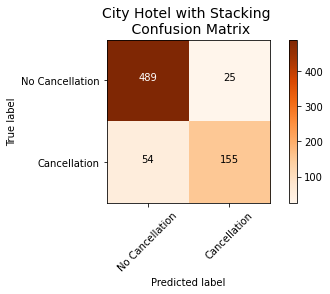

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
import sklearn.metrics as metrics

rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nRandomForest Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="City Hotel with Stacking \n Confusion Matrix", cmap=plt.cm.Oranges)

##Gradient Boost Tuning

In [ ]:
gb_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
skf = StratifiedKFold(n_splits=10)
i = 0
score = []
model = gb_model
print("CV Gradient Boost\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV Gradient Boost

Accuracy in CV - 1: 0.8758620689655172
Accuracy in CV - 2: 0.8862068965517241
Accuracy in CV - 3: 0.8650519031141869
Accuracy in CV - 4: 0.889273356401384
Accuracy in CV - 5: 0.9100346020761245
Accuracy in CV - 6: 0.8961937716262975
Accuracy in CV - 7: 0.9238754325259516
Accuracy in CV - 8: 0.9065743944636678
Accuracy in CV - 9: 0.889273356401384
Accuracy in CV - 10: 0.8546712802768166

Mean: 0    0.889702
dtype: float64


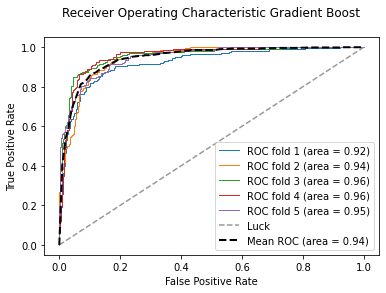

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5)
classifier = gb_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Gradient Boost\n')
plt.legend(loc="lower right")
plt.show()


GradientBoost Result After Tuning:
accuracy score: 0.9004149377593361
recall score: 0.8086124401913876
precision score: 0.8407960199004975
f1score: 0.8774460872021848
MAE: 0.0995850622406639
MSE: 0.0995850622406639
RMSE: 0.3155710098229302
Confusion matrix, without normalization
[[482  32]
 [ 40 169]]


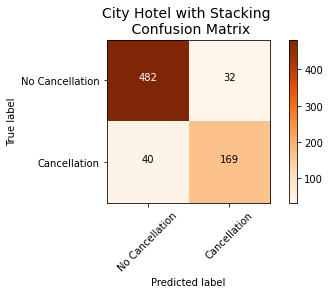

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
import sklearn.metrics as metrics
gb_model.fit(x_train,y_train)
y_pred = gb_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nGradientBoost Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="City Hotel with Stacking \n Confusion Matrix", cmap=plt.cm.Oranges)

##LGBM Tuning

In [ ]:
lgbm_model = lgb.LGBMClassifier(max_depth=-1, random_state=888, silent=False, metric='None', n_jobs=4, n_estimators=1000)

In [ ]:
skf = StratifiedKFold(n_splits=10)
i = 0
score = []
model = lgbm_model
print("CV LGBM\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV LGBM

Accuracy in CV - 1: 0.9275862068965517
Accuracy in CV - 2: 0.8931034482758621
Accuracy in CV - 3: 0.9134948096885813
Accuracy in CV - 4: 0.9204152249134948
Accuracy in CV - 5: 0.8788927335640139
Accuracy in CV - 6: 0.889273356401384
Accuracy in CV - 7: 0.8788927335640139
Accuracy in CV - 8: 0.916955017301038
Accuracy in CV - 9: 0.8823529411764706
Accuracy in CV - 10: 0.9273356401384083

Mean: 0    0.90283
dtype: float64


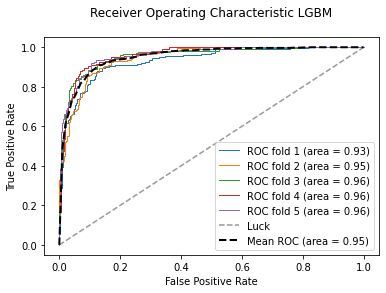

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5)
classifier = lgbm_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic LGBM\n')
plt.legend(loc="lower right")
plt.show()


LGBM Result After Tuning:
accuracy score: 0.9017980636237898
recall score: 0.8038277511961722
precision score: 0.8484848484848485
f1score: 0.8786089440564898
MAE: 0.09820193637621023
MSE: 0.09820193637621023
RMSE: 0.3133718819170128
Confusion matrix, without normalization
[[484  30]
 [ 41 168]]


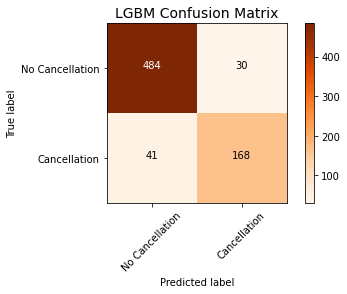

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
import sklearn.metrics as metrics
lgbm_model = lgbm_model.fit(x_train,y_train)
y_pred = lgbm_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nLGBM Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="LGBM Confusion Matrix", cmap=plt.cm.Oranges)

##MLP

In [ ]:
'''mlp_clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)'''
mlp_clf = MLPClassifier()
from sklearn.model_selection import StratifiedKFold, learning_curve
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = mlp_clf
print("CV MLP\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV MLP

Accuracy in CV - 1: 0.8275862068965517
Accuracy in CV - 2: 0.8793103448275862
Accuracy in CV - 3: 0.8685121107266436
Accuracy in CV - 4: 0.8166089965397924
Accuracy in CV - 5: 0.8512110726643599
Accuracy in CV - 6: 0.8477508650519031
Accuracy in CV - 7: 0.8615916955017301
Accuracy in CV - 8: 0.8788927335640139
Accuracy in CV - 9: 0.8685121107266436
Accuracy in CV - 10: 0.8823529411764706

Mean: 0    0.858233
dtype: float64


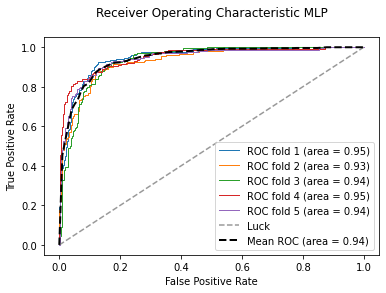

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5)
classifier = mlp_clf
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic MLP\n')
plt.legend(loc="lower right")
plt.show()


MLP Result After Tuning:
accuracy score: 0.8893499308437067
recall score: 0.7272727272727273
precision score: 0.8685714285714285
f1score: 0.8581685499058381
MAE: 0.11065006915629322
MSE: 0.11065006915629322
RMSE: 0.3326410515199428
Confusion matrix, without normalization
[[491  23]
 [ 57 152]]


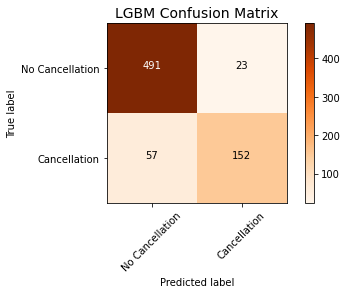

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
import sklearn.metrics as metrics
lgbm_model = mlp_clf.fit(x_train,y_train)
y_pred = mlp_clf.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nMLP Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="LGBM Confusion Matrix", cmap=plt.cm.Oranges)

##Bagging + LGBM

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
lgbm = lgb.LGBMClassifier()
lgb_bagging_model = BalancedBaggingClassifier(base_estimator=lgbm, n_estimators=140, random_state=12)

In [ ]:
bbc = BalancedBaggingClassifier(base_estimator=lgb.LGBMClassifier(),
                          bootstrap=True, bootstrap_features=False,
                          max_features=0.5, max_samples=0.5, n_estimators=100,
                          n_jobs=1, oob_score=False, random_state=None,
                          ratio=None, replacement=False,
                          sampling_strategy='auto', verbose=0,
                          warm_start=False)

In [ ]:
from sklearn.model_selection import StratifiedKFold, learning_curve
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = bbc
print("CV LGBM + Bagging\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV LGBM + Bagging

Accuracy in CV - 1: 0.9
Accuracy in CV - 2: 0.8862068965517241
Accuracy in CV - 3: 0.8823529411764706
Accuracy in CV - 4: 0.8719723183391004
Accuracy in CV - 5: 0.8685121107266436
Accuracy in CV - 6: 0.8719723183391004
Accuracy in CV - 7: 0.8546712802768166
Accuracy in CV - 8: 0.8961937716262975
Accuracy in CV - 9: 0.8788927335640139
Accuracy in CV - 10: 0.8961937716262975

Mean: 0    0.880697
dtype: float64


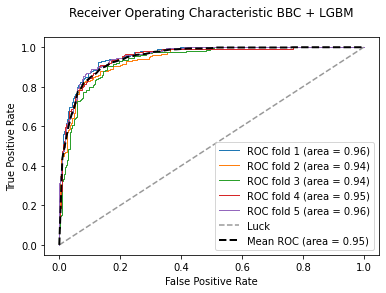

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5)
classifier = bbc
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic BBC + LGBM\n')
plt.legend(loc="lower right")
plt.show()


MLP Result After Tuning:
accuracy score: 0.8796680497925311
recall score: 0.8851674641148325
precision score: 0.7459677419354839
f1score: 0.8608301823339004
MAE: 0.12033195020746888
MSE: 0.12033195020746888
RMSE: 0.3468889594776243
Confusion matrix, without normalization
[[451  63]
 [ 24 185]]


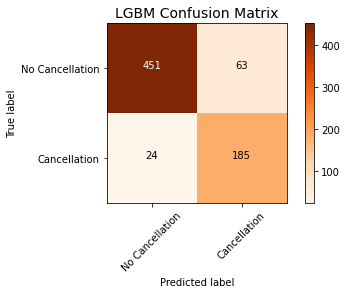

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
import sklearn.metrics as metrics
bbc = bbc.fit(x_train,y_train)
y_pred = bbc.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nMLP Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="LGBM Confusion Matrix", cmap=plt.cm.Oranges)

In [ ]:
x_train.head()

2  3  4   6   7   8  10  11  12  13  14  16  17  18  20  21   22  23  \
36    17  4  9  34  10  29  21   6   5  11  34  15  41  24  15   7  131  64   
328    4  3  1   6   4   7   3   1   2   3   9   2  10   5   2   5   26  13   
1300   3  1  1   1   0   4   0   0   1   0   3   0   1   0   0   0    3   0   
2631   0  0  0   1   0   0   1   0   0   0   1   0   3   0   0   2    3   2   
840    3  0  4   1   3   4   6   1   3   1   5   7   3   1   0   1   12   3   

      24  25  26  27  28  30  31  32  33  34  35  36  37  38  39  40  \
36    53  31  17  31  47   8  18  10  53  22  53  14  34  15   2   9   
328   15   5   0   5   3   2   5   2  38   5  10   2   5   4   3   7   
1300   3   6   0   2   1   0   0   1   4   0   3   0   0   0   0   1   
2631   0   0   0   2   0   1   3   1   1   0   1   2   1   0   0   1   
840    3   4   1   6   0   0   0   2  17   1   9   1   0   3   5   1   

      no_missing_discrete  sum_discrete  sum_zero_discrete  word_max  count_0  
36                      2             2                  0        22        1  
328                     2             2                  0        33        3  
1300                    1             1                  1        25       18  
2631                    0             0                  1        17       21  
840                     2             2                  0        33        8

In [ ]:
test_cln.head()

id    2    3    4    6    7     8   10   11   12   13    14   16   17  \
0  3621  0.0  0.0  0.0  0.0  0.0   0.0  1.0  0.0  0.0  1.0   2.0  1.0  0.0   
1  3622  0.0  1.0  1.0  3.0  3.0   6.0  3.0  3.0  1.0  3.0   1.0  0.0  3.0   
2  3623  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
3  3624  0.0  0.0  0.0  0.0  1.0   4.0  5.0  0.0  1.0  0.0   5.0  0.0  0.0   
4  3625  0.0  1.0  2.0  7.0  2.0  12.0  6.0  2.0  3.0  0.0  10.0  4.0  3.0   

    18   20   21    22   23   24   25   26   27   28   30   31   32   33   34  \
0  0.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  3.0  1.0  0.0   4.0  5.0  7.0  4.0  0.0  1.0  4.0  1.0  0.0  2.0  5.0  3.0   
2  0.0  0.0  0.0   0.0  1.0  0.0  2.0  0.0  1.0  1.0  0.0  0.0  0.0  2.0  0.0   
3  0.0  4.0  0.0   2.0  0.0  0.0  3.0  2.0  1.0  0.0  2.0  5.0  1.0  4.0  0.0   
4  2.0  1.0  2.0  12.0  5.0  1.0  8.0  1.0  2.0  1.0  1.0  1.0  1.0  4.0  2.0   

     35   36   37   38   39   40  no_missing_discrete  sum_discrete  \
0   0.0  0.0  0.0  1.0  0.0  0.0                  0.0           0.0   
1   6.0  0.0  1.0  0.0  1.0  4.0                  2.0           1.0   
2   3.0  0.0  0.0  0.0  2.0  0.0                  0.0           0.0   
3   5.0  2.0  3.0  3.0  3.0  5.0                  1.0           1.0   
4  13.0  4.0  1.0  0.0  0.0  4.0                  2.0           2.0   

   sum_zero_discrete  word_max  
0                2.0      14.0  
1                0.0      24.0  
2                2.0      35.0  
3                1.0      10.0  
4                0.0      35.0

#Voting

In [ ]:
extra_model = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
                   learning_rate=0.2, n_estimators=2, random_state=7)


rf_model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

gb_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

lgbm_model = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=1000)

bbc = BalancedBaggingClassifier(base_estimator=lgb.LGBMClassifier(),
                          bootstrap=True, bootstrap_features=False,
                          max_features=0.5, max_samples=0.5, n_estimators=100,
                          n_jobs=1, oob_score=False, random_state=None,
                          ratio=None, replacement=False,
                          sampling_strategy='auto', verbose=0,
                          warm_start=False)

mlp_clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
kfold = StratifiedKFold(n_splits=10)

In [ ]:
extra_model.fit(X,y)
rf_model.fit(X,y)
gb_model.fit(X,y)
lgbm_model.fit(X,y)
bbc.fit(X,y)
mlp_clf.fit(X,y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

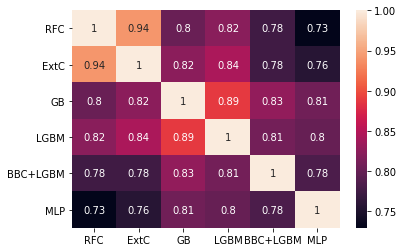

In [ ]:
test_Survived_RFC = pd.Series(rf_model.predict(x_test), name="RFC")
test_Survived_ExtC = pd.Series(extra_model.predict(x_test), name="ExtC")
test_Survived_GBC = pd.Series(gb_model.predict(x_test), name="GB")
test_Survived_LGBMC = pd.Series(lgbm_model.predict(x_test), name="LGBM")
test_Survived_LGBMBBC = pd.Series(bbc.predict(x_test), name="BBC+LGBM")
test_Survived_MLP = pd.Series(mlp_clf.predict(x_test), name="MLP")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_GBC, test_Survived_LGBMC, test_Survived_LGBMBBC,test_Survived_MLP],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [ ]:
votingC = VotingClassifier(estimators=[('rfc', rf_model), ('extc', extra_model),
('lgbm',lgbm_model),('gb',gb_model),('lgbmbbc',bbc),('mlp',mlp_clf)], voting='soft', n_jobs=4)

votingC = votingC.fit(x_train, y_train)

In [ ]:
skf = StratifiedKFold(n_splits=10)
i = 0
score = []
model = votingC
print("CV Voting\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV Voting

Accuracy in CV - 1: 0.9137931034482759
Accuracy in CV - 2: 0.906896551724138
Accuracy in CV - 3: 0.9134948096885813
Accuracy in CV - 4: 0.9134948096885813
Accuracy in CV - 5: 0.8788927335640139
Accuracy in CV - 6: 0.8961937716262975
Accuracy in CV - 7: 0.8719723183391004
Accuracy in CV - 9: 0.8961937716262975
Accuracy in CV - 10: 0.9377162629757786

Mean: 0    0.903868
dtype: float64


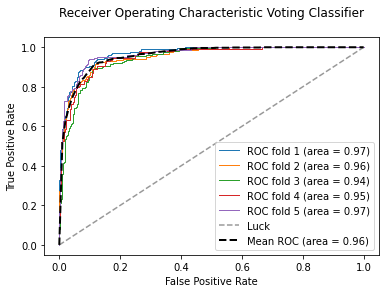

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5, random_state=7)
classifier = votingC
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Voting Classifier\n')
plt.legend(loc="lower right")
plt.show()


Voting Result After Tuning:
accuracy score: 0.9128630705394191
recall score: 0.8277511961722488
precision score: 0.865
f1score: 0.892606800225401
MAE: 0.08713692946058091
MSE: 0.08713692946058091
RMSE: 0.29518964998891967
Confusion matrix, without normalization
[[487  27]
 [ 36 173]]


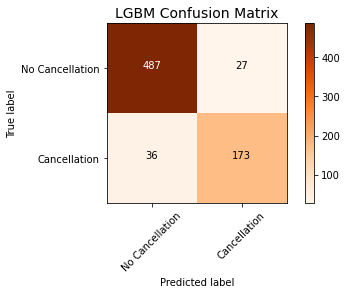

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
import sklearn.metrics as metrics

votingC = votingC.fit(x_train, y_train)
y_pred = votingC.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nVoting Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="LGBM Confusion Matrix", cmap=plt.cm.Oranges)

In [ ]:
test_cln.head()

id     1    2    3    4     5    6    7     8    9   10   11   12   13  \
0  3621   8.0  0.0  0.0  0.0   1.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  1.0   
1  3622  42.0  0.0  1.0  1.0   5.0  3.0  3.0   6.0  6.0  3.0  3.0  1.0  3.0   
2  3623   5.0  0.0  0.0  0.0   1.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
3  3624  33.0  0.0  0.0  0.0   7.0  0.0  1.0   4.0  4.0  5.0  0.0  1.0  0.0   
4  3625  87.0  0.0  1.0  2.0  16.0  7.0  2.0  12.0  2.0  6.0  2.0  3.0  0.0   

     14   15   16   17   18    19   20   21    22   23   24   25   26   27  \
0   2.0  2.0  1.0  0.0  0.0   5.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  0.0   
1   1.0  7.0  0.0  3.0  3.0  31.0  1.0  0.0   4.0  5.0  7.0  4.0  0.0  1.0   
2   0.0  3.0  0.0  0.0  0.0   3.0  0.0  0.0   0.0  1.0  0.0  2.0  0.0  1.0   
3   5.0  6.0  0.0  0.0  0.0  17.0  4.0  0.0   2.0  0.0  0.0  3.0  2.0  1.0   
4  10.0  4.0  4.0  3.0  2.0  48.0  1.0  2.0  12.0  5.0  1.0  8.0  1.0  2.0   

    28    29   30   31   32   33   34    35   36   37   38   39   40  \
0  0.0   0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0  1.0  0.0  0.0   
1  4.0   6.0  1.0  0.0  2.0  5.0  3.0   6.0  0.0  1.0  0.0  1.0  4.0   
2  1.0   0.0  0.0  0.0  0.0  2.0  0.0   3.0  0.0  0.0  0.0  2.0  0.0   
3  0.0  15.0  2.0  5.0  1.0  4.0  0.0   5.0  2.0  3.0  3.0  3.0  5.0   
4  1.0   7.0  1.0  1.0  1.0  4.0  2.0  13.0  4.0  1.0  0.0  0.0  4.0   

   no_missing_discrete  sum_discrete  sum_zero_discrete  no_missing    sum  \
0                  0.0           0.0                2.0       0.250   23.0   
1                  2.0           1.0                0.0       0.725  165.0   
2                  0.0           0.0                2.0       0.225   19.0   
3                  1.0           1.0                1.0       0.500  122.0   
4                  2.0           2.0                0.0       0.800  260.0   

   count_0  word_max  
0     24.0       1.0  
1      5.0       1.0  
2     25.0       1.0  
3     14.0       1.0  
4      2.0       1.0

In [ ]:
importance

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 'no_missing',
 'sum',
 'count_0',
 'word_min',
 'word_max',
 'range',
 'abs_avg',
 'word_q25',
 'word_q75',
 'word_q95']

In [ ]:
x_train.head()

1  2   3   4   5   6  7   8   9  10  11  12  13  14  15  16  17  18  \
2554   14  1   0   1   1   1  2   0   1   1   0   2   1   1   1   0   2   0   
1948   25  2   0   0   8   1  0   3   1   0   2   1   0   4   0   0   0   0   
2746   11  0   0   0   0   0  0   0   2   0   0   0   0   2   2   0   0   0   
112   253  6  29  11  45  10  5  26  45  10  14   6   4   8  59   9  10   3   
580    95  3   1   2  14   6  5  10  12   9   5   3   1  12  14   1  20   9   

       19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  \
2554   13   0   0   3   0   2   1   0   0   6   3   0   2   3   0   0   1   0   
1948    8   0   1   1   0   0   3   0   1   0   1   0   1   1   0   0   3   0   
2746    6   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   
112   138   5   1  39   7   5  15   3  11  10  43   6   6  10  46   3  28   3   
580   111   4   1  39  16  15  11   3  15   6  16  16   1   1  12   7  17   3   

      37  38  39  40  no_missing  sum  count_0  word_min  word_max  range  \
2554   0   1   1   1          21   62       13         3         1     -2   
1948   0   1   0   1          17   64       17         3         1     -2   
2746   0   0   1   1           6   24       28         2         1     -1   
112   14   8   6  14          34  901        0        21         1    -20   
580   18   5   6  17          34  496        0         3        19     16   

      abs_avg  word_q25  word_q75  word_q95  
2554        2         0         4        23  
1948        2         0         4        23  
2746        1         0         4        23  
112        11         0         4        23  
580        11         0         4        23

In [ ]:
test_cln.head()

id     1    2    3    4     5    6    7     8    9   10   11   12   13  \
0  3621   8.0  0.0  0.0  0.0   1.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  1.0   
1  3622  42.0  0.0  1.0  1.0   5.0  3.0  3.0   6.0  6.0  3.0  3.0  1.0  3.0   
2  3623   5.0  0.0  0.0  0.0   1.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
3  3624  33.0  0.0  0.0  0.0   7.0  0.0  1.0   4.0  4.0  5.0  0.0  1.0  0.0   
4  3625  87.0  0.0  1.0  2.0  16.0  7.0  2.0  12.0  2.0  6.0  2.0  3.0  0.0   

     14   15   16   17   18    19   20   21    22   23   24   25   26   27  \
0   2.0  2.0  1.0  0.0  0.0   5.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  0.0   
1   1.0  7.0  0.0  3.0  3.0  31.0  1.0  0.0   4.0  5.0  7.0  4.0  0.0  1.0   
2   0.0  3.0  0.0  0.0  0.0   3.0  0.0  0.0   0.0  1.0  0.0  2.0  0.0  1.0   
3   5.0  6.0  0.0  0.0  0.0  17.0  4.0  0.0   2.0  0.0  0.0  3.0  2.0  1.0   
4  10.0  4.0  4.0  3.0  2.0  48.0  1.0  2.0  12.0  5.0  1.0  8.0  1.0  2.0   

    28    29   30   31   32   33   34    35   36   37   38   39   40  \
0  0.0   0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0  1.0  0.0  0.0   
1  4.0   6.0  1.0  0.0  2.0  5.0  3.0   6.0  0.0  1.0  0.0  1.0  4.0   
2  1.0   0.0  0.0  0.0  0.0  2.0  0.0   3.0  0.0  0.0  0.0  2.0  0.0   
3  0.0  15.0  2.0  5.0  1.0  4.0  0.0   5.0  2.0  3.0  3.0  3.0  5.0   
4  1.0   7.0  1.0  1.0  1.0  4.0  2.0  13.0  4.0  1.0  0.0  0.0  4.0   

   no_missing    sum  count_0  word_max  word_min  range  abs_avg  word_q25  \
0        10.0   23.0     24.0       1.0       2.0   -1.0      1.5       0.0   
1        29.0  165.0      5.0       1.0       2.0   -1.0      1.5       0.0   
2         9.0   19.0     25.0       1.0       2.0   -1.0      1.5       0.0   
3        20.0  122.0     14.0       1.0       2.0   -1.0      1.5       0.0   
4        32.0  260.0      2.0       1.0       2.0   -1.0      1.5       0.0   

   word_q75  word_q95  
0       4.0      23.0  
1       4.0      23.0  
2       4.0      23.0  
3       4.0      23.0  
4       4.0      23.0

In [ ]:
test_cln = test_cln.drop(['no_missing_discrete','sum_discrete','sum_zero_discrete','maxi'],axis=1)

In [ ]:
pred = pd.Series(votingC.predict(test_cln.iloc[:,1:]), name="Result")

results = pd.concat([ibobTest['id'], pred], axis=1)

results.to_csv("votingjul.csv",index=False)


In [ ]:
dups = dup.id_x
dups["Result"] = dup.Result_y

In [ ]:
dups.shape

(174,)

In [ ]:
dup = testpred.merge(train_unique,how='inner',on=col).astype('int')
dup.head()

id_x  word-1  word-2  word-3  word-4  word-5  word-6  word-7  word-8  \
0  3643       2       0       0       0       0       0       0       0   
1  3788       2       0       0       0       0       0       0       0   
2  4075       2       0       0       0       0       0       0       0   
3  4804       2       0       0       0       0       0       0       0   
4  4933       2       0       0       0       0       0       0       0   

   word-9  word-10  word-11  word-12  word-13  word-14  word-15  word-16  \
0       1        0        0        0        0        1        1        0   
1       1        0        0        0        0        1        1        0   
2       1        0        0        0        0        1        1        0   
3       1        0        0        0        0        1        1        0   
4       1        0        0        0        0        1        1        0   

   word-17  word-18  word-19  word-20  word-21  word-22  word-23  word-24  \
0        0        0        1        0        0        0        0        0   
1        0        0        1        0        0        0        0        0   
2        0        0        1        0        0        0        0        0   
3        0        0        1        0        0        0        0        0   
4        0        0        1        0        0        0        0        0   

   word-25  word-26  word-27  word-28  word-29  word-30  word-31  word-32  \
0        0        0        1        0        0        0        0        0   
1        0        0        1        0        0        0        0        0   
2        0        0        1        0        0        0        0        0   
3        0        0        1        0        0        0        0        0   
4        0        0        1        0        0        0        0        0   

   word-33  word-34  word-35  word-36  word-37  word-38  word-39  word-40  \
0        0        0        0        1        0        0        0        0   
1        0        0        0        1        0        0        0        0   
2        0        0        0        1        0        0        0        0   
3        0        0        0        1        0        0        0        0   
4        0        0        0        1        0        0        0        0   

   Result_x  id_y  Result_y  
0         0    37         0  
1         0    37         0  
2         0    37         0  
3         0    37         0  
4         0    37         0

In [ ]:
results

id  Result
0     3621       1
1     3622       0
2     3623       0
3     3624       0
4     3625       0
5     3626       0
6     3627       0
7     3628       1
8     3629       1
9     3630       0
10    3631       0
11    3632       0
12    3633       1
13    3634       0
14    3635       0
15    3636       0
16    3637       0
17    3638       0
18    3639       0
19    3640       1
20    3641       0
21    3642       0
22    3643       0
23    3644       0
24    3645       0
25    3646       0
26    3647       1
27    3648       0
28    3649       0
29    3650       1
30    3651       0
31    3652       1
32    3653       1
33    3654       1
34    3655       0
35    3656       0
36    3657       0
37    3658       0
38    3659       0
39    3660       0
40    3661       0
41    3662       0
42    3663       0
43    3664       0
44    3665       1
45    3666       0
46    3667       0
47    3668       0
48    3669       1
49    3670       1
50    3671       1
51    3672       0
52    3673       0
53    3674       1
54    3675       0
55    3676       0
56    3677       0
57    3678       0
58    3679       0
59    3680       0
60    3681       1
61    3682       0
62    3683       0
63    3684       0
64    3685       0
65    3686       0
66    3687       0
67    3688       0
68    3689       0
69    3690       0
70    3691       0
71    3692       0
72    3693       1
73    3694       0
74    3695       1
75    3696       0
76    3697       1
77    3698       0
78    3699       0
79    3700       0
80    3701       1
81    3702       1
82    3703       0
83    3704       1
84    3705       1
85    3706       1
86    3707       1
87    3708       0
88    3709       0
89    3710       0
90    3711       0
91    3712       0
92    3713       0
93    3714       1
94    3715       0
95    3716       1
96    3717       1
97    3718       0
98    3719       1
99    3720       0
100   3721       0
101   3722       0
102   3723       0
103   3724       0
104   3725       0
105   3726       1
106   3727       0
107   3728       0
108   3729       1
109   3730       1
110   3731       0
111   3732       0
112   3733       0
113   3734       0
114   3735       0
115   3736       0
116   3737       0
117   3738       0
118   3739       0
119   3740       0
120   3741       0
121   3742       1
122   3743       0
123   3744       1
124   3745       0
125   3746       0
126   3747       0
127   3748       0
128   3749       0
129   3750       0
130   3751       0
131   3752       0
132   3753       0
133   3754       0
134   3755       0
135   3756       0
136   3757       0
137   3758       1
138   3759       1
139   3760       1
140   3761       1
141   3762       0
142   3763       0
143   3764       0
144   3765       1
145   3766       1
146   3767       1
147   3768       1
148   3769       0
149   3770       1
150   3771       0
151   3772       1
152   3773       1
153   3774       0
154   3775       1
155   3776       1
156   3777       0
157   3778       0
158   3779       0
159   3780       0
160   3781       0
161   3782       0
162   3783       0
163   3784       1
164   3785       1
165   3786       0
166   3787       1
167   3788       0
168   3789       0
169   3790       1
170   3791       1
171   3792       0
172   3793       0
173   3794       0
174   3795       1
175   3796       1
176   3797       0
177   3798       1
178   3799       1
179   3800       0
180   3801       0
181   3802       0
182   3803       0
183   3804       1
184   3805       0
185   3806       0
186   3807       0
187   3808       1
188   3809       0
189   3810       0
190   3811       1
191   3812       0
192   3813       0
193   3814       1
194   3815       1
195   3816       0
196   3817       0
197   3818       0
198   3819       0
199   3820       1
200   3821       1
201   3822       0
202   3823       0
203   3824       0
204   3825       0
205   3826       0
206   3827       0
207   3828       0
208   3829       0
209   3830       0

In [ ]:
test_Survived = pd.Series(votingC.predict(test_cln.iloc[:,1:]), name="Result")

results = pd.concat([ibobTest['id'], pred], axis=1)

#results.to_csv("ensemble.csv",index=False)


ValueError: ignored

#ENSEMBLE

In [ ]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

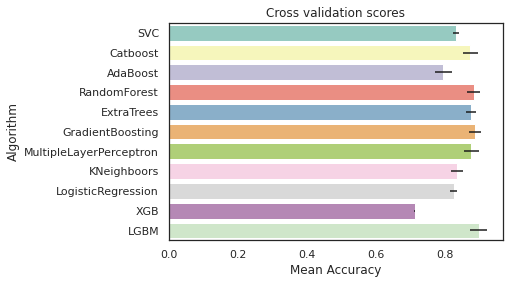

In [ ]:
# Modeling step Test differents algorithms 
from nltk.classify.scikitlearn import SklearnClassifier  ## wrapper for scikitlearn in nltk
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier # Stochastic Gradiant Descent
from sklearn.svm import SVC, LinearSVC, NuSVC
random_state = 7
classifiers = []
classifiers.append(SVC(kernel='linear',random_state=random_state))
classifiers.append(CatBoostClassifier(
                    iterations=500,
                    max_ctr_complexity=4,
                    random_seed=0,
                    od_type='Iter',
                    od_wait=25,
                    depth=4,
                    silent=True))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))
classifiers.append(ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=10,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=7, verbose=0,
                     warm_start=False))
classifiers.append(GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(xgb.XGBClassifier(max_depth=8, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=0))
classifiers.append(lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=False, metric='None', n_jobs=4, n_estimators=1000))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","Catboost","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","XGB","LGBM"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
stack.sum()

ExtraTrees      0.0
RandomForest    0.0
GB              0.0
LGBM            0.0
dtype: float64

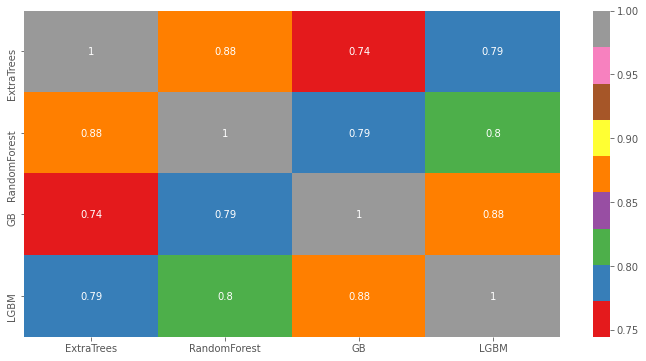

In [ ]:
cor = stack.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

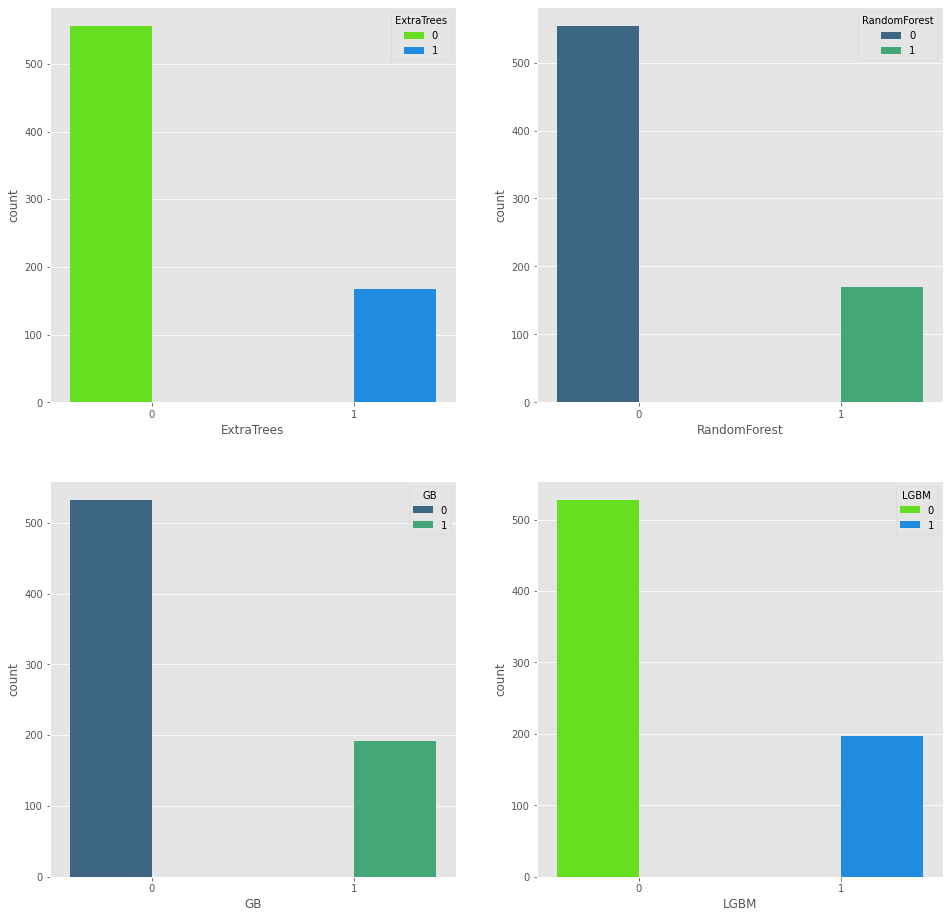

In [ ]:
fig ,ax = plt.subplots(2,2,figsize=(16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=stack,x='ExtraTrees',hue='ExtraTrees',palette='gist_rainbow',ax=ax1)
sns.countplot(data=stack,x='RandomForest',hue='RandomForest',palette='viridis',ax=ax2)
sns.countplot(data=stack,x='GB',hue='GB',palette='viridis',ax=ax3)
sns.countplot(data=stack,x='LGBM',hue='LGBM',palette='gist_rainbow',ax=ax4)

In [ ]:
stack = stack.iloc[:,:4]

In [ ]:
stack["sum"] = np.ceil(stack.mean(axis=1))

In [ ]:
stack

ExtraTrees  RandomForest  GB  LGBM  sum
0             1             0   1     1  1.0
1             0             0   0     0  0.0
2             0             0   0     1  1.0
3             1             1   1     1  1.0
4             0             1   1     1  1.0
5             1             0   1     1  1.0
6             0             1   0     0  1.0
7             0             0   0     0  0.0
8             0             0   0     0  0.0
9             1             1   1     1  1.0
10            0             0   0     0  0.0
11            0             0   0     0  0.0
12            1             1   0     1  1.0
13            0             0   0     0  0.0
14            0             0   0     0  0.0
15            0             0   0     0  0.0
16            0             0   0     0  0.0
17            0             0   0     0  0.0
18            0             0   0     0  0.0
19            0             0   0     0  0.0
20            1             1   1     1  1.0
21            0             0   0     0  0.0
22            0             0   0     0  0.0
23            0             0   0     0  0.0
24            1             0   1     1  1.0
25            0             0   0     0  0.0
26            0             0   0     0  0.0
27            0             0   0     0  0.0
28            0             0   0     0  0.0
29            0             0   0     1  1.0
30            1             1   1     1  1.0
31            0             0   0     0  0.0
32            0             0   0     0  0.0
33            0             0   0     0  0.0
34            1             1   1     1  1.0
35            0             0   0     0  0.0
36            1             1   1     1  1.0
37            0             0   0     0  0.0
38            0             0   0     1  1.0
39            0             0   0     0  0.0
40            0             0   1     1  1.0
41            1             1   1     1  1.0
42            0             0   0     0  0.0
43            1             1   1     1  1.0
44            0             0   0     0  0.0
45            1             1   1     1  1.0
46            1             1   1     1  1.0
47            0             0   0     0  0.0
48            0             0   0     0  0.0
49            0             0   0     0  0.0
50            0             0   0     0  0.0
51            1             1   1     1  1.0
52            0             0   0     0  0.0
53            0             0   0     0  0.0
54            0             0   0     0  0.0
55            0             0   0     0  0.0
56            0             0   0     0  0.0
57            1             1   1     1  1.0
58            0             0   1     1  1.0
59            0             0   1     0  1.0
60            1             1   1     1  1.0
61            1             1   1     1  1.0
62            0             0   0     0  0.0
63            0             0   0     0  0.0
64            0             0   0     0  0.0
65            0             0   0     0  0.0
66            0             0   0     0  0.0
67            0             0   0     0  0.0
68            0             0   0     0  0.0
69            0             0   0     0  0.0
70            0             0   0     0  0.0
71            1             1   1     1  1.0
72            1             1   1     1  1.0
73            0             0   0     0  0.0
74            0             0   0     0  0.0
75            1             1   1     1  1.0
76            0             0   0     0  0.0
77            1             1   1     1  1.0
78            0             0   0     0  0.0
79            1             1   1     1  1.0
80            1             1   1     1  1.0
81            0             0   0     1  1.0
82            0             0   0     0  0.0
83            0             0   0     0  0.0
84            0             0   0     0  0.0
85            1             1   1     1  1.0
86            0             0   0     0  0.0
87            1             1   1     1  1.0


In [ ]:
y_pred = stack["sum"]


Stacking Result:
accuracy score: 0.9031811894882434
recall score: 0.9043062200956937
precision score: 0.7907949790794979
f1score: 0.8868048597194389
MAE: 0.09681881051175657
MSE: 0.09681881051175657
RMSE: 0.3111572118909613
Confusion matrix, without normalization
[[464  50]
 [ 20 189]]


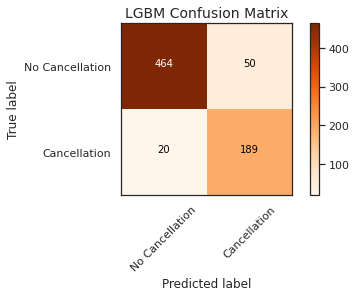

In [ ]:
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nStacking Result:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="LGBM Confusion Matrix", cmap=plt.cm.Oranges)

#PREDICT WITH ENSEMBLE

In [ ]:
extra_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=10,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

rf_model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

gb_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

lgbm_model = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=1000)

In [ ]:
extra_model.fit(X,y)
rf_model.fit(X,y)
gb_model.fit(X,y)
lgbm_model.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='None', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=4, num_leaves=31,
               objective=None, random_state=314, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
fstack= pd.DataFrame(columns=['ExtraTrees', 'RandomForest', 'GB','LGBM'])

In [ ]:
test_cln.iloc[:,1:].head()

word-1  word-2    word-3    word-4    word-5    word-6    word-7  \
0  0.769800     0.0  0.000000  0.000000  0.096225  0.000000  0.000000   
1  0.742927     0.0  0.017689  0.017689  0.088444  0.053066  0.053066   
2  0.589256     0.0  0.000000  0.000000  0.117851  0.000000  0.000000   
3  0.749613     0.0  0.000000  0.000000  0.159009  0.000000  0.022716   
4  0.827334     0.0  0.009510  0.019019  0.152153  0.066567  0.019019   

     word-8    word-9   word-10   word-11   word-12   word-13   word-14  \
0  0.000000  0.000000  0.096225  0.000000  0.000000  0.096225  0.192450   
1  0.106132  0.106132  0.053066  0.053066  0.017689  0.053066  0.017689   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.090862  0.090862  0.113578  0.000000  0.022716  0.000000  0.113578   
4  0.114115  0.019019  0.057058  0.019019  0.028529  0.000000  0.095096   

    word-15   word-16   word-17   word-18   word-19   word-20   word-21  ...  \
0  0.192450  0.096225  0.000000  0.000000  0.481125  0.000000  0.000000  ...   
1  0.123821  0.000000  0.053066  0.053066  0.548351  0.017689  0.000000  ...   
2  0.353553  0.000000  0.000000  0.000000  0.353553  0.000000  0.000000  ...   
3  0.136293  0.000000  0.000000  0.000000  0.386164  0.090862  0.000000  ...   
4  0.038038  0.038038  0.028529  0.019019  0.456460  0.009510  0.019019  ...   

    word-23   word-24   word-25   word-26   word-27   word-28   word-29  \
0  0.000000  0.096225  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.088444  0.123821  0.070755  0.000000  0.017689  0.070755  0.106132   
2  0.117851  0.000000  0.235702  0.000000  0.117851  0.117851  0.000000   
3  0.000000  0.000000  0.068147  0.045431  0.022716  0.000000  0.340733   
4  0.047548  0.009510  0.076077  0.009510  0.019019  0.009510  0.066567   

    word-30   word-31   word-32   word-33   word-34   word-35   word-36  \
0  0.000000  0.000000  0.000000  0.096225  0.000000  0.000000  0.000000   
1  0.017689  0.000000  0.035377  0.088444  0.053066  0.106132  0.000000   
2  0.000000  0.000000  0.000000  0.235702  0.000000  0.353553  0.000000   
3  0.045431  0.113578  0.022716  0.090862  0.000000  0.113578  0.045431   
4  0.009510  0.009510  0.009510  0.038038  0.019019  0.123625  0.038038   

    word-37   word-38   word-39   word-40  no_missing_discrete  sum_discrete  \
0  0.000000  0.096225  0.000000  0.000000             0.000000      0.000000   
1  0.017689  0.000000  0.017689  0.070755             0.017689      0.035377   
2  0.000000  0.000000  0.235702  0.000000             0.000000      0.000000   
3  0.068147  0.068147  0.068147  0.113578             0.000000      0.045431   
4  0.009510  0.000000  0.000000  0.038038             0.009510      0.028529   

   sum_zero_discrete  
0           0.192450  
1           0.000000  
2           0.235702  
3           0.022716  
4           0.000000  

[5 rows x 43 columns]

In [ ]:
X.head()

word-2    word-3    word-4    word-5    word-6    word-7    word-8  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.169031   
1  0.006581  0.026325  0.019744  0.032907  0.032907  0.013163  0.059232   
2  0.025206  0.025206  0.126028  0.201645  0.075617  0.050411  0.050411   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.019658  0.026210  0.026210  0.016381  0.085183  0.003276  0.068801   

     word-9   word-10   word-11   word-12   word-13   word-14   word-15  \
0  0.000000  0.169031  0.169031  0.000000  0.000000  0.169031  0.000000   
1  0.125046  0.039488  0.006581  0.013163  0.019744  0.059232  0.098721   
2  0.050411  0.025206  0.025206  0.025206  0.000000  0.025206  0.176439   
3  0.188982  0.000000  0.000000  0.000000  0.000000  0.188982  0.188982   
4  0.114669  0.032763  0.016381  0.029486  0.013105  0.045868  0.137603   

    word-16   word-17   word-18   word-19   word-20   word-21   word-22  \
0  0.000000  0.000000  0.000000  0.169031  0.000000  0.000000  0.000000   
1  0.026325  0.065814  0.059232  0.519928  0.006581  0.000000  0.125046   
2  0.025206  0.025206  0.025206  0.428496  0.025206  0.025206  0.176439   
3  0.000000  0.000000  0.000000  0.188982  0.000000  0.000000  0.000000   
4  0.042591  0.049144  0.019658  0.068801  0.065525  0.013105  0.281758   

    word-23   word-24   word-25   word-26   word-27   word-28   word-29  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.169031   
1  0.111883  0.032907  0.164534  0.000000  0.052651  0.013163  0.032907   
2  0.025206  0.000000  0.277262  0.050411  0.025206  0.025206  0.050411   
3  0.000000  0.000000  0.000000  0.000000  0.188982  0.000000  0.000000   
4  0.062249  0.081906  0.058973  0.016381  0.045868  0.078630  0.183471   

    word-30   word-31   word-32   word-33   word-34   word-35   word-36  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.013163  0.006581  0.019744  0.085558  0.059232  0.098721  0.019744   
2  0.000000  0.000000  0.025206  0.126028  0.025206  0.025206  0.025206   
3  0.000000  0.000000  0.000000  0.566947  0.000000  0.000000  0.000000   
4  0.065525  0.019658  0.032763  0.009829  0.016381  0.160537  0.085183   

    word-37   word-38   word-39   word-40  no_missing_discrete  sum_discrete  \
0  0.000000  0.000000  0.000000  0.000000             0.000000      0.000000   
1  0.006581  0.085558  0.019744  0.006581             0.006581      0.019744   
2  0.000000  0.000000  0.000000  0.000000             0.025206      0.050411   
3  0.000000  0.188982  0.000000  0.000000             0.000000      0.000000   
4  0.078630  0.075354  0.013105  0.078630             0.003276      0.009829   

   sum_zero_discrete  
0           0.338062  
1           0.000000  
2           0.000000  
3           0.377964  
4           0.000000

In [ ]:
fpred = extra_model.predict(test_cln.iloc[:,1:])
fstack["ExtraTrees"] = fpred
fpred = rf_model.predict(test_cln.iloc[:,1:])
fstack["RandomForest"] = fpred
fpred = gb_model.predict(test_cln.iloc[:,1:])
fstack["GB"] = fpred
fpred = lgbm_model.predict(test_cln.iloc[:,1:])
fstack["LGBM"] = fpred

In [ ]:
fstack["ExtraTrees"].sum()

331

In [ ]:
fstack["RandomForest"].sum()

380

In [ ]:
fstack["GB"].sum()

423

In [ ]:
fstack["LGBM"].sum()

420

In [ ]:
fstack["Result"] = np.round(fstack.mean(axis=1))

In [ ]:
fstack['Result'].sum()

350.0

In [ ]:
pred = fstack["Result"].astype('int').astype('str')

In [ ]:
ans = pd.concat([ibobTest['id'], pred], axis=1)
#ans.rename(columns={'LGBM':'Result'}, inplace=True)
ans.to_csv("all4model.csv",index=False)

#TEST ExtraTrees (0.89032)
#TEST LGBM Tuning all feature (0.90322)

In [ ]:
ibobTest.fillna(ibobTest.median(),inplace=True)

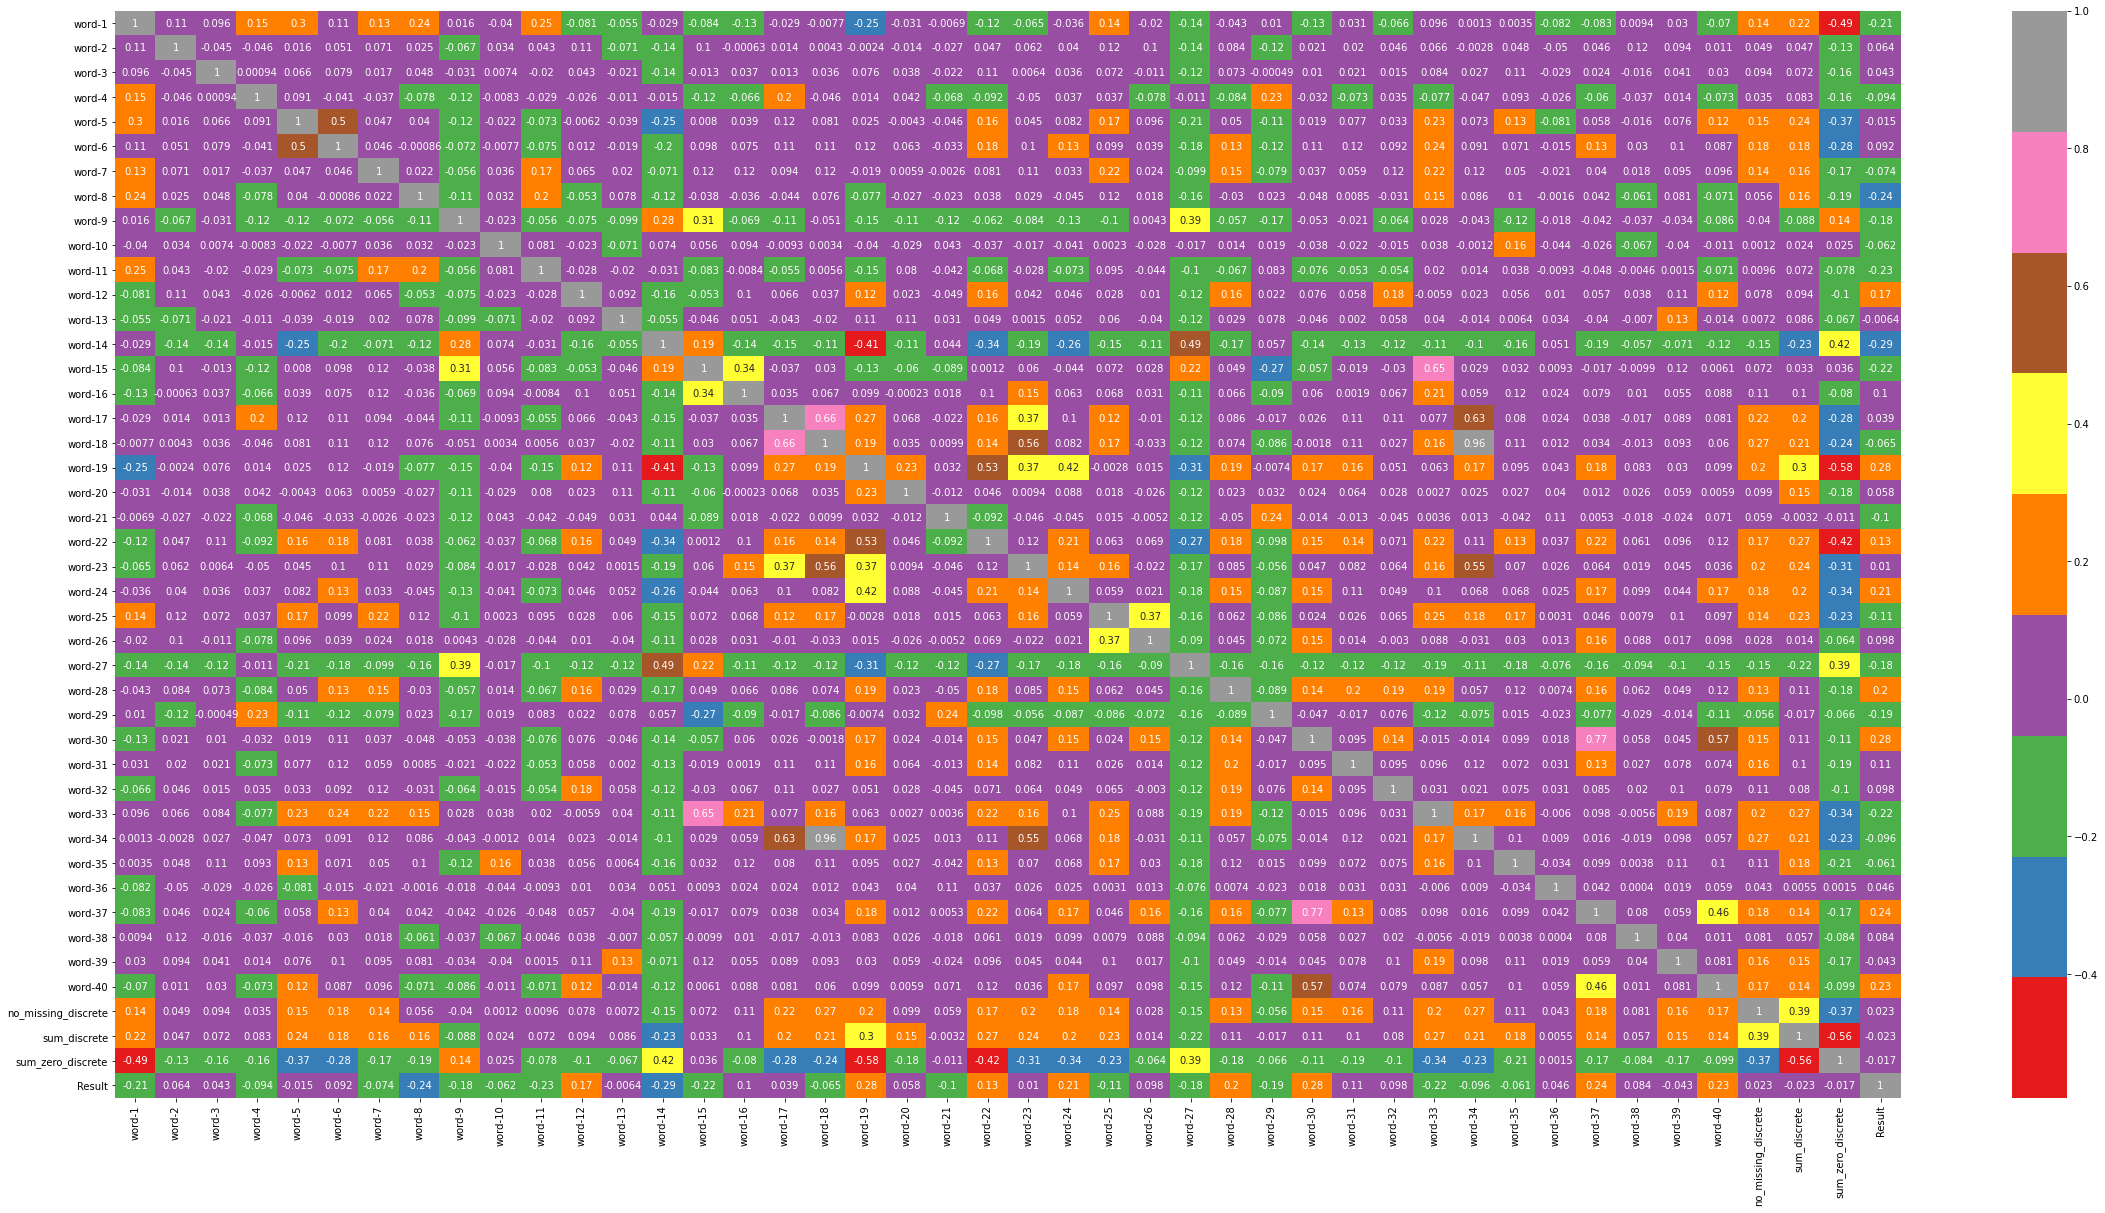

In [ ]:
cor = train_cln.corr()
plt.figure(figsize=(40,20))
sns.heatmap(cor,cmap='Set1',annot=True)

##Cari TF

In [ ]:
ibobTest["sum"] = ibobTest.sum(axis=1)

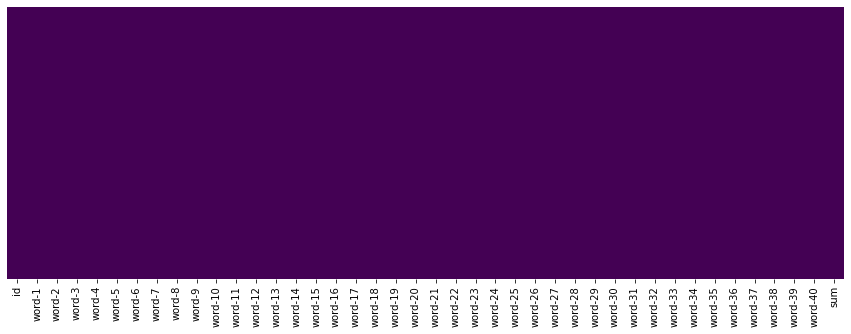

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(15,5))
sns.heatmap(ibobTest.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
tf_test = ibobTest.iloc[:,1:41].div(ibobTest["sum"], axis=0)

##Cari IDF

In [ ]:
df_test = ibobTest.shape[0]/ibobTest.iloc[:,1:41].astype(bool).sum(axis=0)

In [ ]:
ibobTest.iloc[:,1:41].astype(bool).head()

word-1  word-2  word-3  word-4  word-5  word-6  word-7  word-8  word-9  \
0    True   False   False   False    True   False   False   False   False   
1    True   False    True    True    True    True    True    True    True   
2    True   False   False   False    True   False   False   False   False   
3    True   False   False   False    True   False    True    True    True   
4    True   False    True    True    True    True    True    True    True   

   word-10  word-11  word-12  word-13  word-14  word-15  word-16  word-17  \
0     True    False    False     True     True     True     True    False   
1     True     True     True     True     True     True    False     True   
2    False    False    False    False    False     True    False    False   
3     True    False     True    False     True     True    False    False   
4     True     True     True    False     True     True     True     True   

   word-18  word-19  word-20  word-21  word-22  word-23  word-24  word-25  \
0    False     True    False    False    False    False     True    False   
1     True     True     True    False     True     True     True     True   
2    False     True    False    False    False     True    False     True   
3    False     True     True    False     True    False    False     True   
4     True     True     True     True     True     True     True     True   

   word-26  word-27  word-28  word-29  word-30  word-31  word-32  word-33  \
0    False    False    False    False    False    False    False     True   
1    False     True     True     True     True    False     True     True   
2    False     True     True    False    False    False    False     True   
3     True     True    False     True     True     True     True     True   
4     True     True     True     True     True     True     True     True   

   word-34  word-35  word-36  word-37  word-38  word-39  word-40  
0    False    False    False    False     True    False    False  
1     True     True    False     True    False     True     True  
2    False     True    False    False    False     True    False  
3    False     True     True     True     True     True     True  
4     True     True     True     True    False    False     True

In [ ]:
ibobTest.shape[0]

1552

In [ ]:
df_test.head()

word-1    1.007138
word-2    1.987196
word-3    2.167598
word-4    1.906634
word-5    1.204969
dtype: float64

In [ ]:
idf_test = np.log10(df_test)

In [ ]:
tf_idf_test= ibobTest.iloc[:,1:41]
for i in ibobTest.iloc[:,1:41]:
  tf_idf_test[i] = idf_test[i] * tf_test[i]

In [ ]:
tf_idf_test.head()

word-1  word-2    word-3    word-4    word-5    word-6    word-7  \
0  0.000007     0.0  0.000000  0.000000  0.000022  0.000000  0.000000   
1  0.000034     0.0  0.000088  0.000074  0.000107  0.000173  0.000247   
2  0.000004     0.0  0.000000  0.000000  0.000022  0.000000  0.000000   
3  0.000027     0.0  0.000000  0.000000  0.000150  0.000000  0.000083   
4  0.000069     0.0  0.000086  0.000143  0.000332  0.000393  0.000160   

     word-8    word-9   word-10   word-11   word-12   word-13   word-14  \
0  0.000000  0.000000  0.000045  0.000000  0.000000  0.000097  0.000061   
1  0.000180  0.000119  0.000129  0.000164  0.000093  0.000280  0.000029   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000121  0.000080  0.000217  0.000000  0.000094  0.000000  0.000148   
4  0.000351  0.000039  0.000251  0.000106  0.000273  0.000000  0.000285   

    word-15   word-16   word-17   word-18   word-19   word-20   word-21  \
0  0.000027  0.000086  0.000000  0.000000  0.000009  0.000000  0.000000   
1  0.000089  0.000000  0.000160  0.000278  0.000053  0.000096  0.000000   
2  0.000040  0.000000  0.000000  0.000000  0.000005  0.000000  0.000000   
3  0.000077  0.000000  0.000000  0.000000  0.000029  0.000388  0.000000   
4  0.000050  0.000320  0.000156  0.000180  0.000080  0.000094  0.000172   

    word-22   word-23   word-24   word-25   word-26   word-27   word-28  \
0  0.000000  0.000000  0.000047  0.000000  0.000000  0.000000  0.000000   
1  0.000093  0.000162  0.000313  0.000128  0.000000  0.000030  0.000263   
2  0.000000  0.000034  0.000000  0.000066  0.000000  0.000032  0.000068   
3  0.000047  0.000000  0.000000  0.000097  0.000264  0.000031  0.000000   
4  0.000271  0.000158  0.000043  0.000248  0.000127  0.000059  0.000064   

    word-29   word-30   word-31   word-32   word-33   word-34   word-35  \
0  0.000000  0.000000  0.000000  0.000000  0.000033  0.000000  0.000000   
1  0.000093  0.000093  0.000000  0.000148  0.000159  0.000293  0.000154   
2  0.000000  0.000000  0.000000  0.000000  0.000066  0.000000  0.000080   
3  0.000233  0.000189  0.000574  0.000075  0.000128  0.000000  0.000130   
4  0.000105  0.000091  0.000111  0.000072  0.000123  0.000190  0.000325   

    word-36   word-37   word-38   word-39   word-40  
0  0.000000  0.000000  0.000072  0.000000  0.000000  
1  0.000000  0.000055  0.000000  0.000068  0.000240  
2  0.000000  0.000000  0.000000  0.000141  0.000000  
3  0.000167  0.000166  0.000208  0.000205  0.000302  
4  0.000323  0.000053  0.000000  0.000000  0.000233

In [ ]:
fpred = rf_model.predict(ibobTest.iloc[:,1:41])
fpred = pd.DataFrame(fpred)

In [ ]:
ans = pd.concat([ibobTest['id'], fpred], axis=1)
ans.rename(columns={0:'Result'}, inplace=True)
ans['Result'].replace({0:'0',1:'1'},inplace=True)
ans['Result'] = ans['Result'].astype('str')
ans.to_csv("rf.csv",index=False)

#COBACOBA

In [ ]:
plt.figure(figsize= (60, 60))
sns.heatmap(ibobTrain.corr())

In [ ]:
ibobTrain.iloc[:,40:42]

In [ ]:
ibobTrain.sum()

word-1     178845.0
word-2       5513.0
word-3       4256.0
word-4       6261.0
word-5      30688.0
word-6       9682.0
word-7       4632.0
word-8      15627.0
word-9      21566.0
word-10     10638.0
word-11      7418.0
word-12      4267.0
word-13      4350.0
word-14     10223.0
word-15     29582.0
word-16      4673.0
word-17      9549.0
word-18      4793.0
word-19    145306.0
word-20      4643.0
word-21      4105.0
word-22     33533.0
word-23     17056.0
word-24     14310.0
word-25     17363.0
word-26      3236.0
word-27      9905.0
word-28      8169.0
word-29     35734.0
word-30      5295.0
word-31      4153.0
word-32      5857.0
word-33     21237.0
word-34      4444.0
word-35     20226.0
word-36      5481.0
word-37     10598.0
word-38      7177.0
word-39      6667.0
word-40      8701.0
Result       1018.0
sum        756777.0
dtype: float64

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
# T-SNE Implementation
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
# PCA Implementation
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)

In [ ]:
import matplotlib.patches as mpatches
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Spam')
red_patch = mpatches.Patch(color='#AF0000', label='Spam')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Spam', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Spam', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Spam', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Spam', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Spam', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Spam', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [ ]:
all.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
#import necessary libraries
import pandas as pd
import sklearn as sk
import math 
#load up our sample sentences
first= 'The car is driven on the road'
second= 'The truck is driven on the highway'
#split so each word have their own string
first = first.split(" ")
second= second.split(" ")
#join them to remove common duplicate words
total= set(first).union(set(second))
print(total)
#Now lets add a way to count the words using a dictionary key-value pairing for both sentences
wordDictA = dict.fromkeys(total, 0) 
wordDictB = dict.fromkeys(total, 0)
for word in first:
    wordDictA[word]+=1
    
for word in second:
    wordDictB[word]+=1
#put them in a dataframe and then view the result:
pd.DataFrame([wordDictA, wordDictB])

{'truck', 'driven', 'the', 'on', 'highway', 'road', 'The', 'is', 'car'}


truck  driven  the  on  highway  road  The  is  car
0      0       1    1   1        0     1    1   1    1
1      1       1    1   1        1     0    1   1    0

In [ ]:
#Now writing the TF function:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict
#running our sentences through the tf function:
tfFirst = computeTF(wordDictA, first)
tfSecond = computeTF(wordDictB, second)
#Converting to dataframe for visualization
tf_df= pd.DataFrame([tfFirst, tfSecond])

#PLOT

In [ ]:
train_cln.head()

1     2     3      4      5     6     7      8      9    10    11  \
0  1898.0  81.0  32.0  117.0  305.0  27.0  13.0  135.0  267.0  67.0  66.0   
1  1450.0  28.0  30.0   66.0  173.0  42.0   7.0  111.0   87.0  64.0  65.0   
2   951.0  47.0  25.0   26.0  181.0  83.0  16.0   61.0  174.0  44.0  23.0   
3   911.0  35.0  20.0   34.0  150.0  13.0   3.0   49.0   97.0  56.0  21.0   
4   843.0  28.0  66.0   18.0  144.0  69.0  18.0   45.0  126.0  30.0   5.0   

     12    13    14     15    16    17    18     19    20    21     22     23  \
0  56.0  26.0  27.0  120.0  39.0   0.0   0.0  972.0  40.0  28.0  126.0   95.0   
1  14.0  21.0  12.0   76.0  19.0  27.0   3.0  908.0  16.0   8.0  158.0   84.0   
2  29.0  45.0  37.0  275.0  38.0  83.0  43.0  858.0  16.0  17.0  191.0  110.0   
3  26.0  12.0   8.0   62.0  13.0  31.0   3.0  764.0  29.0  14.0  143.0   75.0   
4   8.0  13.0  39.0  109.0  10.0  38.0  16.0  754.0  33.0  20.0  223.0   61.0   

      24     25    26    27    28     29    30    31    32     33    34  \
0  131.0   93.0  26.0  27.0  28.0  302.0   2.0  57.0  25.0   40.0   0.0   
1   70.0  108.0   8.0  62.0  10.0  136.0   7.0   9.0  55.0   27.0   3.0   
2  122.0   88.0   6.0  32.0  77.0  147.0  29.0   1.0  66.0  210.0  32.0   
3   47.0   41.0  16.0  23.0   7.0  149.0   6.0  20.0  25.0   17.0   0.0   
4   92.0   52.0  18.0  27.0  57.0  125.0  13.0  20.0  20.0   99.0  15.0   

      35    36     37    38    39    40  no_missing_discrete  sum_discrete  \
0  132.0  67.0  108.0  41.0   1.0   2.0                  2.0           2.0   
1   47.0  27.0   41.0  53.0  38.0   1.0                  2.0           2.0   
2  111.0  22.0   46.0  37.0  63.0  42.0                  2.0           2.0   
3   51.0  26.0   38.0  50.0   9.0   0.0                  2.0           2.0   
4   88.0  21.0   30.0  36.0   4.0   7.0                  2.0           2.0   

   sum_zero_discrete  no_missing     sum  count_0  Result  word_max  
0                0.0       0.775  5268.0      3.0     1.0       1.0  
1                0.0       0.850  3964.0      0.0     0.0       1.0  
2                0.0       0.850  4183.0      0.0     0.0       1.0  
3                0.0       0.825  2920.0      1.0     1.0       1.0  
4                0.0       0.850  3254.0      0.0     1.0       1.0

In [ ]:
t0 = train_cln[train_cln.Result == 0]
t1 = train_cln[train_cln.Result == 1]

Text(0.5, 1.0, 'Distribution of word frequency sum')

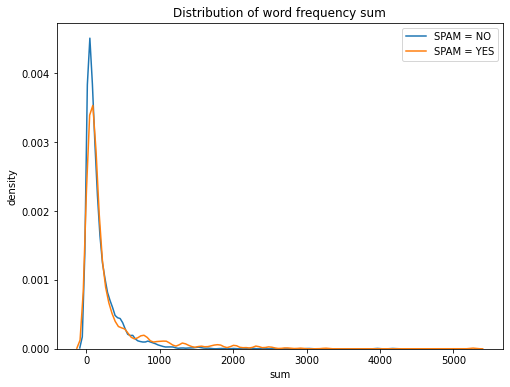

In [ ]:
#Density plot dari member duration days

plt.figure(figsize = (8,6))

sns.kdeplot(train_cln.loc[train_cln['Result'] == 0, 'sum'], label = 'SPAM = NO')
sns.kdeplot(train_cln.loc[train_cln['Result'] == 1, 'sum'], label = 'SPAM = YES')

plt.xlabel('sum')
plt.ylabel('density')
plt.title('Distribution of word frequency sum')

Text(0.5, 1.0, 'Distribution of Count_0')

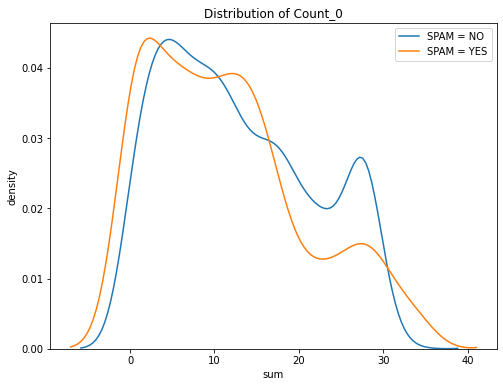

In [ ]:
#Density plot dari member duration days

plt.figure(figsize = (8,6))

sns.kdeplot(train_cln.loc[train_cln['Result'] == 0, 'count_0'], label = 'SPAM = NO')
sns.kdeplot(train_cln.loc[train_cln['Result'] == 1, 'count_0'], label = 'SPAM = YES')

plt.xlabel('sum')
plt.ylabel('density')
plt.title('Distribution of Count_0')

Text(0.5, 1.0, 'Distribution of No Missing Word Frequency')

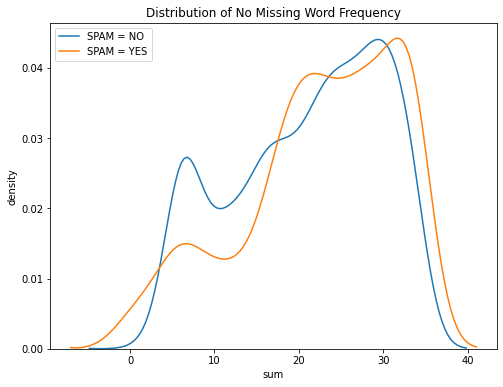

In [ ]:
#Density plot dari member duration days

plt.figure(figsize = (8,6))

sns.kdeplot(train_cln.loc[train_cln['Result'] == 0, 'no_missing'], label = 'SPAM = NO')
sns.kdeplot(train_cln.loc[train_cln['Result'] == 1, 'no_missing'], label = 'SPAM = YES')

plt.xlabel('sum')
plt.ylabel('density')
plt.title('Distribution of No Missing Word Frequency')

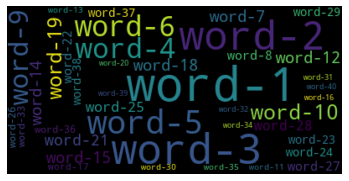

In [ ]:
d = {}
for a, x in bag.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Distribution of word max frequency')

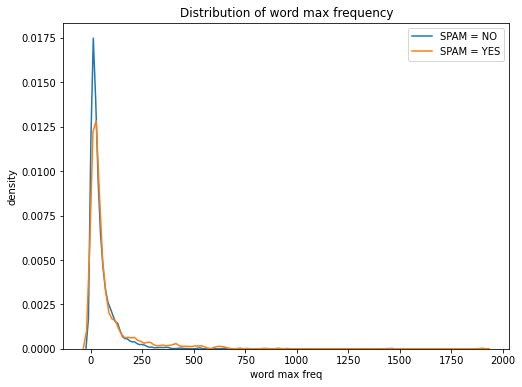

In [ ]:
#Density plot dari member duration days

plt.figure(figsize = (8,6))

sns.kdeplot(train_cln.loc[train_cln['Result'] == 0, 'maxi'], label = 'SPAM = NO')
sns.kdeplot(train_cln.loc[train_cln['Result'] == 1, 'maxi'], label = 'SPAM = YES')

plt.xlabel('word max freq')
plt.ylabel('density')
plt.title('Distribution of word max frequency')

0    2571
1    1044
Name: Result, dtype: int64

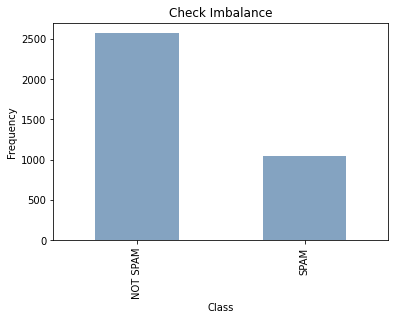

In [ ]:
pd.value_counts(y).plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.title('Check Imbalance')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['NOT SPAM', 'SPAM'])
y.value_counts()

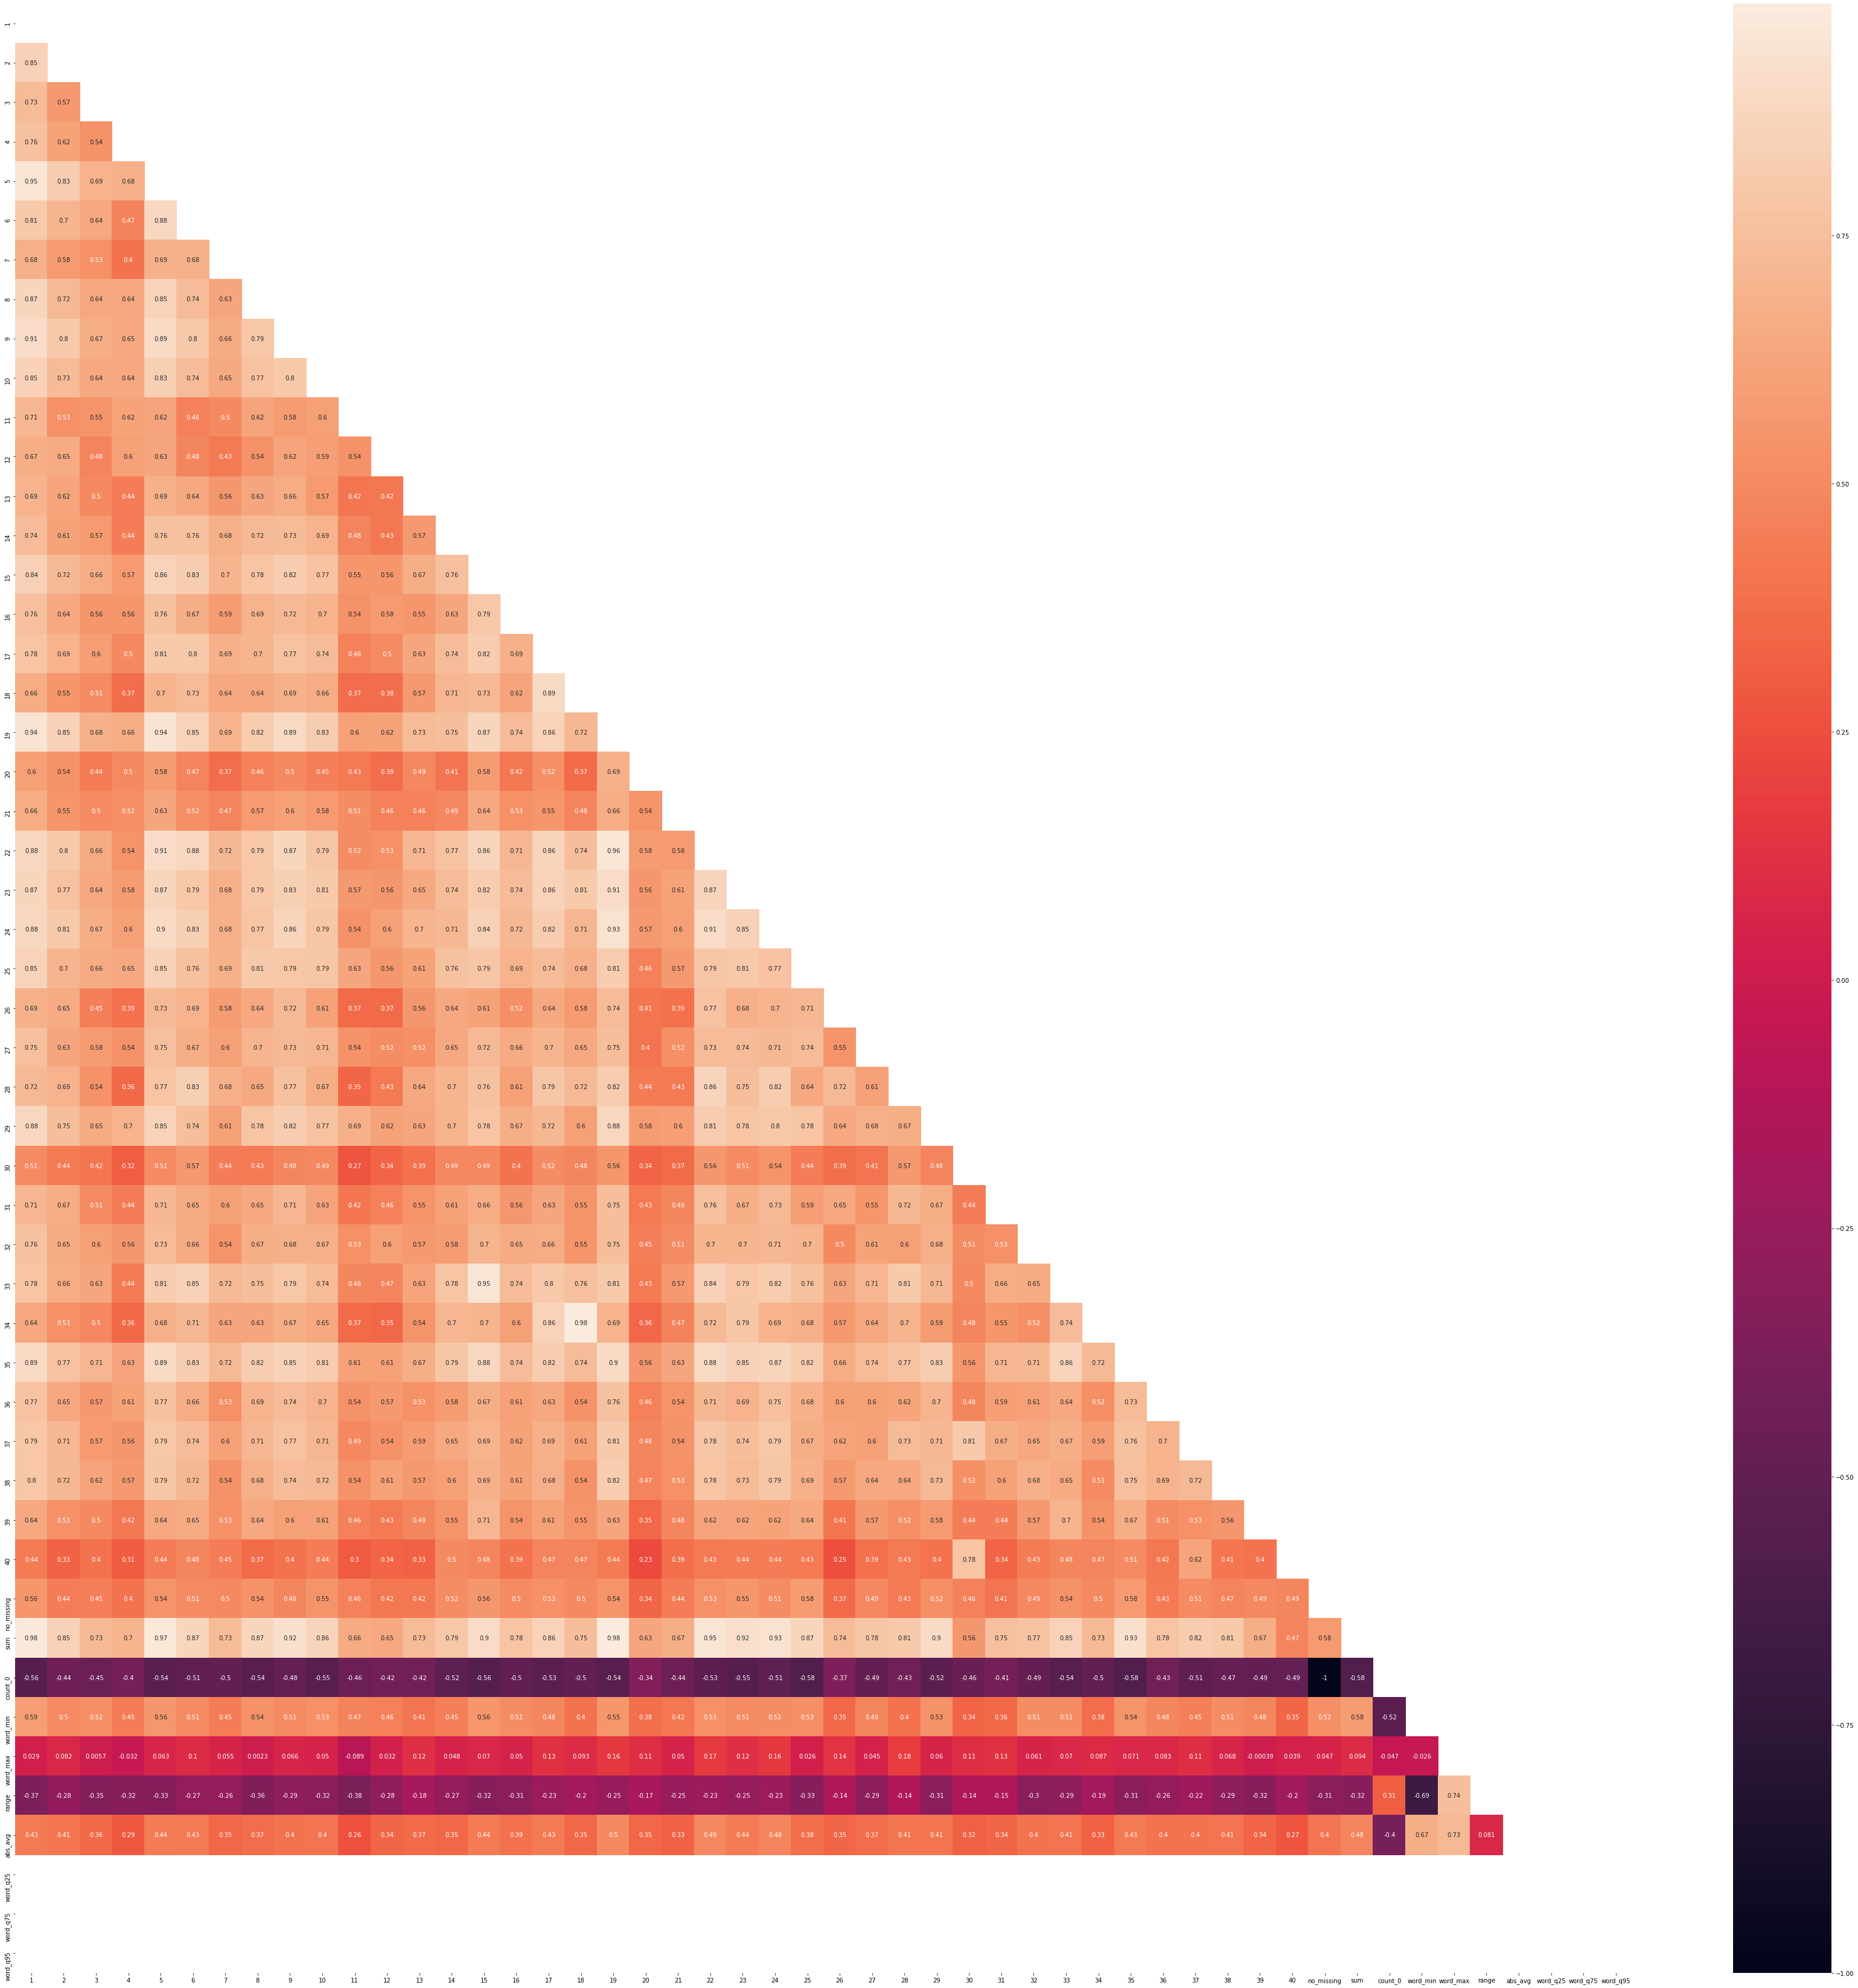

In [ ]:
fig, ax = plt.subplots(figsize=(60, 60)) 
mask = np.zeros_like(X.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(X.corr(), mask= mask, ax= ax, annot= True)

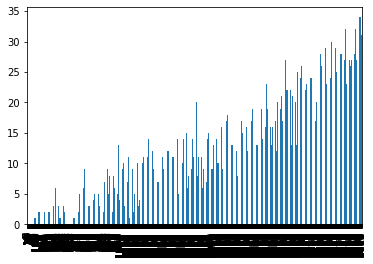

In [ ]:
train_cln.count_0.plot(kind='bar')

Text(0.5, 1.0, 'density plot max_word')

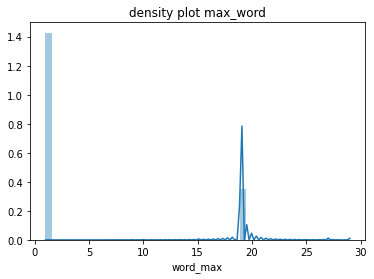

In [ ]:
sns.distplot(train_cln["word_max"]).set_title('density plot max_word')

In [ ]:
from io import StringIO 
  
# wrap the string data in StringIO function 
StringData = StringIO("""Kata
    word-1 
    word-2
    word-3
    word-4
    word-5
    word-6
    word-7
    word-8
    word-9
    word-10
    word-11
    word-12
    word-13
    word-14
    word-15
    word-16
    word-17
    word-18
    word-19
    word-20
    word-21
    word-22
    word-23
    word-24
    word-25
    word-26
    word-27
    word-28
    word-29
    word-30
    word-31
    word-32
    word-33
    word-34
    word-35
    word-36
    word-37
    word-38
    word-39
    word-40
    """) 

In [ ]:
bag = pd.read_csv(StringData, sep =";") 

In [ ]:
bag["freq"] = ibobTrain.iloc[:,1:41].sum(axis=1)

In [ ]:
bag.head()

Kata    freq
0      word-1   5619.0
1       word-2  4171.0
2       word-3  4504.0
3       word-4  3094.0
4       word-5  3440.0